In [174]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Data Load and Preprocessing:
Using pandas library, we loaded the dataset.
We also loaded required libraries for analyzing the dataset.(sklearn for algortihms and matplotlib for plots) 


In [175]:
df = pd.read_csv('dkmacovid_train.csv')
df.sample(2)

,Day,State_ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident_Population_2020_Census,Population_Density_2020_Census,Density_Rank_2020_Census,SexRatio,Confirmed,Deaths,Recovered
807,19,28,Nebraska,41.1254,-98.2681,53113,9417.661631,1944011,1.011110,100496.4309,1961504,25.5,45,100,False,False,True
364,9,47,Virginia,37.7693,-78.1700,355501,4612.666201,4537960,1.366725,53165.6013,8631393,218.6,16,97,True,True,True


## Some plots and visualization to demonstrate each feature static:

#### We plot features and labels to get information about the dataset.
#### We seperate the "Day" column of the dataset and plot the the "Active Cases" , per "Day" in some states. 

<AxesSubplot:title={'center':'#Active cases per day in Virginia'}, xlabel='Day'>

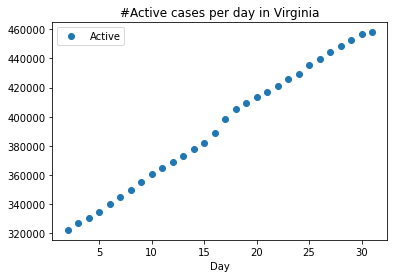

In [176]:
# Some plots and visualization to demonstrate each feature static:
# Let's first plot the number of active cases per day for some states

groups = df.groupby('Day')
df_Virginia = groups.apply(lambda g: g[g['State'] == 'Virginia'])
df_Virginia.plot(x='Day', y='Active', style='o', title='#Active cases per day in Virginia')

#### For example, the plot above, shows the active cases of each day for Virginia state. The active cases are increasing  by Day.

<AxesSubplot:title={'center':'#Active cases per day in California'}, xlabel='Day'>

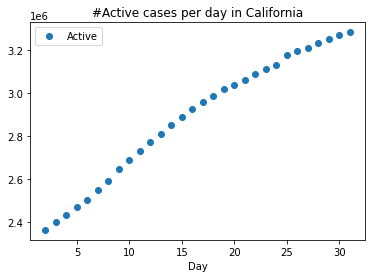

In [177]:
groups = df.groupby('Day')
df_California = groups.apply(lambda g: g[g['State'] == 'California'])
df_California.plot(x='Day', y='Active', style='o', title='#Active cases per day in California')

#### This plot, demonstrate the active cases in California state, which is increasing per day.

####  As you can see, the shape of the curve for active cases per day in Virginia is different from California. 

<AxesSubplot:title={'center':'Testing Rate per day in Virginia'}, xlabel='Day'>

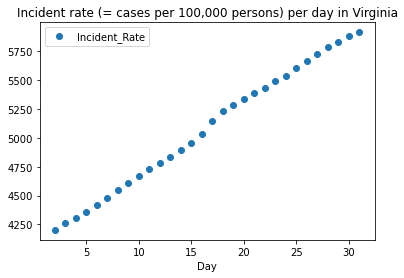

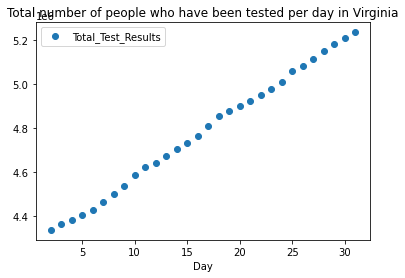

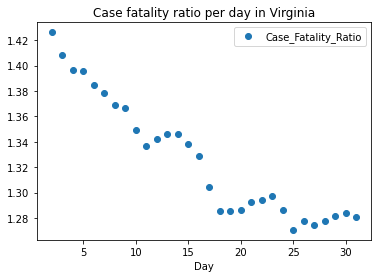

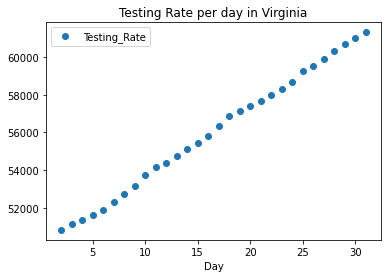

In [178]:
df_Virginia.plot(x='Day', y='Incident_Rate', style='o', title='Incident rate (= cases per 100,000 persons) per day in Virginia')
df_Virginia.plot(x='Day', y='Total_Test_Results', style='o', title='Total number of people who have been tested per day in Virginia')
df_Virginia.plot(x='Day', y='Case_Fatality_Ratio', style='o', title='Case fatality ratio per day in Virginia')
df_Virginia.plot(x='Day', y='Testing_Rate', style='o', title='Testing Rate per day in Virginia')

#### We also plotted four other features, in the Virginia State, "Incident Rate" , "Total Test Results" , "Case Fatality per Day" , "Testing Rate per Day"  in Virginia State.

<AxesSubplot:title={'center':'Was there a daily increase in the # of people recovered in Virginia on differnet days?'}, xlabel='Day'>

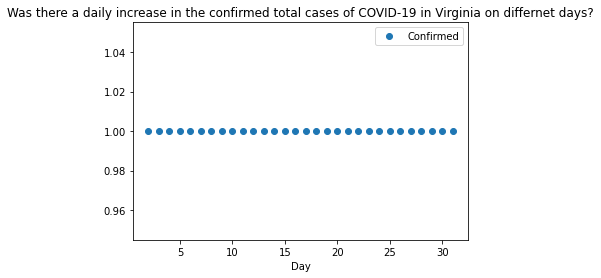

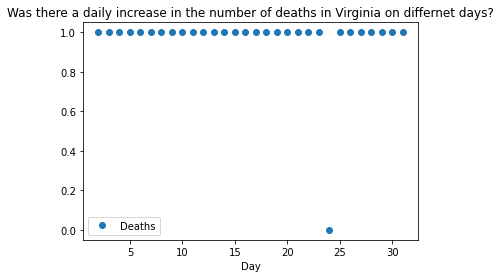

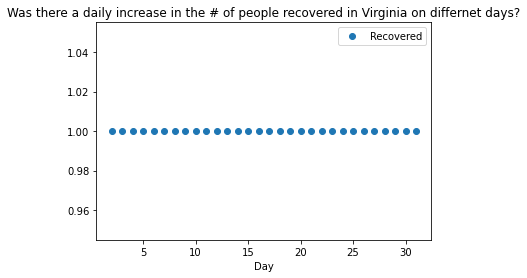

In [179]:
df_Virginia.Confirmed = df_Virginia.Confirmed.replace({False :0 , True :1 })
df_Virginia.Deaths = df_Virginia.Deaths.replace({False :0 , True :1 })
df_Virginia.Recovered = df_Virginia.Recovered.replace({False :0 , True :1 })

df_Virginia.plot(x='Day', y='Confirmed', style='o', title='Was there a daily increase in the confirmed total cases of COVID-19 in Virginia on differnet days?')
df_Virginia.plot(x='Day', y='Deaths', style='o', title='Was there a daily increase in the number of deaths in Virginia on differnet days?')
df_Virginia.plot(x='Day', y='Recovered', style='o', title='Was there a daily increase in the # of people recovered in Virginia on differnet days?')

#### We also plotted three labels ("Confirmed" , "Deaths" , "Recovered") for the data of Virginia State. 
#### Based on the plot we can observe the daily patterns of change in the Confirmed Cases, Deaths and Reovred case of Covid-19.

<AxesSubplot:title={'center':'Testing Rate per day in California'}, xlabel='Day'>

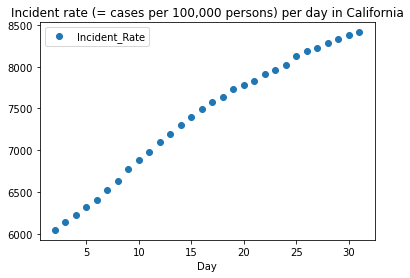

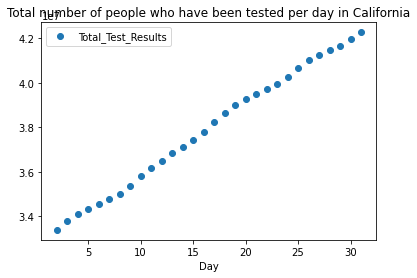

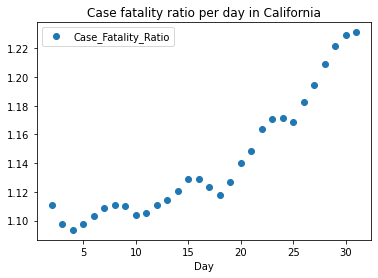

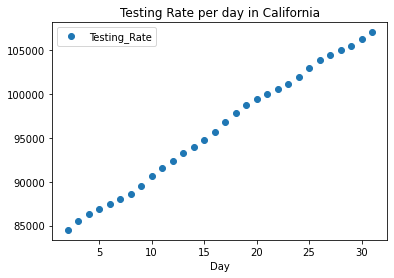

In [180]:
df_California.plot(x='Day', y='Incident_Rate', style='o', title='Incident rate (= cases per 100,000 persons) per day in California')
df_California.plot(x='Day', y='Total_Test_Results', style='o', title='Total number of people who have been tested per day in California')
df_California.plot(x='Day', y='Case_Fatality_Ratio', style='o', title='Case fatality ratio per day in California')
df_California.plot(x='Day', y='Testing_Rate', style='o', title='Testing Rate per day in California')

#### We ploted the same 4 features ("Incident Rate" , "Total Test Results" , "Case Fatality per Day" , "Testing Rate per Day") for the California State as well, to compare with the Virginia State. 

#### For example, Case fatality ratio is decreasing daily in the Virginia state, however it it increasing in the California state. 

<AxesSubplot:title={'center':'Was there a daily increase in the # of people recovered in California on differnet days?'}, xlabel='Day'>

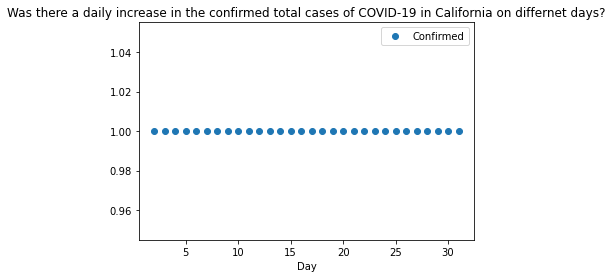

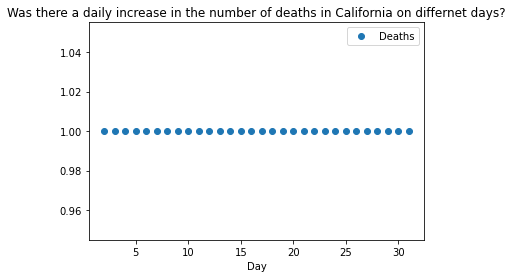

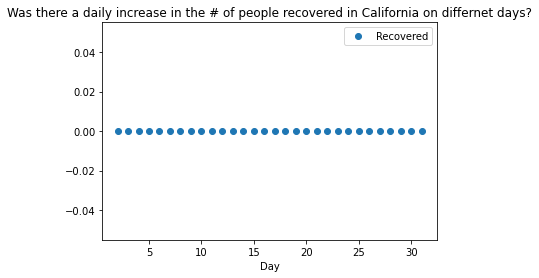

In [181]:
df_California.Confirmed = df_California.Confirmed.replace({False :0 , True :1 })
df_California.Deaths = df_California.Deaths.replace({False :0 , True :1 })
df_California.Recovered = df_California.Recovered.replace({False :0 , True :1 })

df_California.plot(x='Day', y='Confirmed', style='o', title='Was there a daily increase in the confirmed total cases of COVID-19 in California on differnet days?')
df_California.plot(x='Day', y='Deaths', style='o', title='Was there a daily increase in the number of deaths in California on differnet days?')
df_California.plot(x='Day', y='Recovered', style='o', title='Was there a daily increase in the # of people recovered in California on differnet days?')

##### The labels are also plotted per Day for the California state. 

<AxesSubplot:title={'center':'Population per state'}, xlabel='State'>

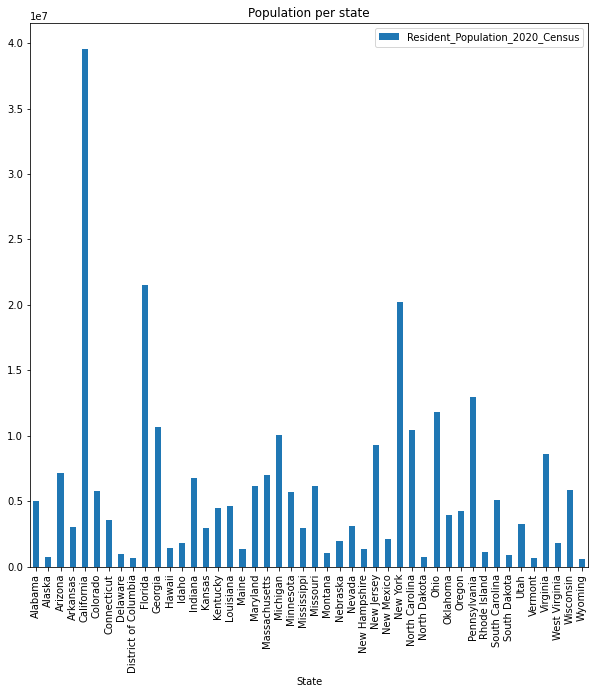

In [182]:
df_states = df.groupby('State').apply(lambda df: df.sample(1))
df_states.plot(x='State', y='Resident_Population_2020_Census', kind='bar', title='Population per state', figsize=(10, 10))

#### We also plotted the population of each state to get a sense of the differences in rates of deaths among states.

<AxesSubplot:title={'center':'Population density of different states'}, xlabel='State'>

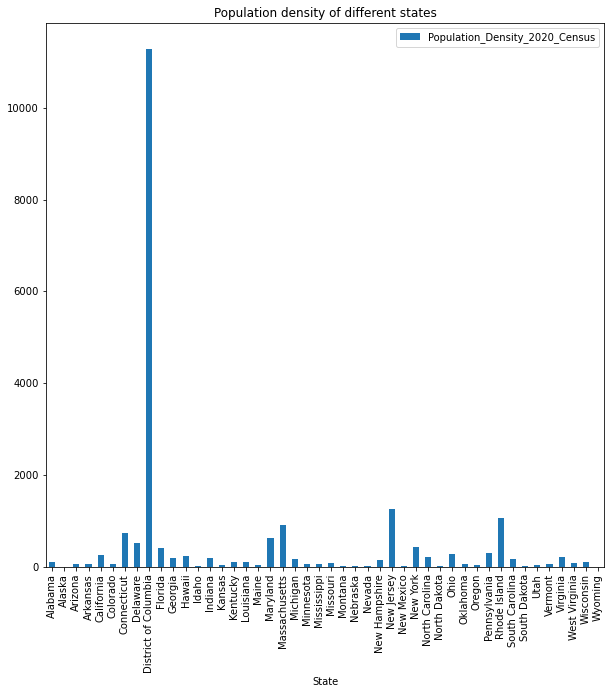

In [183]:
df_states = df.groupby('State').apply(lambda df: df.sample(1))
df_states.plot(x='State', y='Population_Density_2020_Census', kind='bar', title='Population density of different states', figsize=(10, 10))

#### The plot above shows the population density of each state. Distrcict of Columbia has the highest density , and this feature can be helpful for predicting the active covid cases in states.

<AxesSubplot:title={'center':'Density rank of different states'}, xlabel='State'>

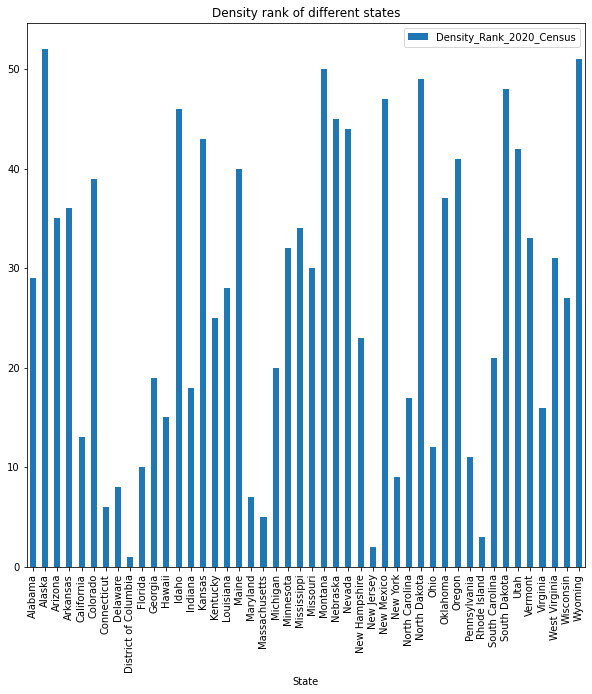

In [19]:
df_states = df.groupby('State').apply(lambda df: df.sample(1))
df_states.plot(x='State', y='Density_Rank_2020_Census', kind='bar', title='Density rank of different states', figsize=(10, 10))

#### This is a plot of Density rank among states.

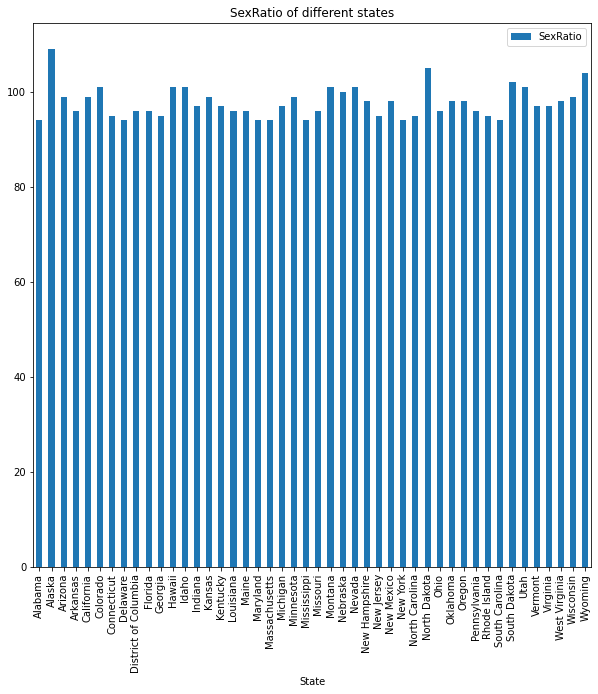

In [142]:
df_states = df.groupby('State').apply(lambda df: df.sample(1))
df_states.plot(x='State', y='SexRatio', kind='bar', title='SexRatio of different states', figsize=(10, 10))

#### We plotted the "Sex Ratio" in states. This could be a feature for classifying active cases , since sex can affect the probablity of getting Covid. 

### Converting Labels:

#### There are three labels of the dataset, that are categorical, and need to be converted to binary labels. This is done by the replace function provided by the data frame library. These labels are our targets to predict. (Recovered, Deaths and Confirmed cases of covid-19 based on the features of dataset) <br>

#### The names of the state are redundant data and can be removed since we have the state ids. <br>
#### We used "Day" as a feature in our dataset , to find patterns in daily increase or decrease of covid active cases, deaths and recovered. <br>
#### We extracted the three labels from our dataset to do preprocessing analysis on the dataset. 



In [23]:
df.Confirmed = df.Confirmed.replace({False :0 , True :1 })
df.Deaths = df.Deaths.replace({False :0 , True :1 })
df.Recovered = df.Recovered.replace({False :0 , True :1 })

df_cp = df.copy()
df_cp = df_cp.drop(columns="State")       #removing state name,  redundant since we can use State_ID 
# TODO: What to do with 'Day'? One option is just using it as a feature without modifying it
Y = df_cp.loc[:,'Recovered'] 

# other targets that we can have:
Y_recovered = Y
Y_deaths = df_cp.loc[:,'Deaths']
Y_confirmed = df_cp.loc[:,'Confirmed']

df_cp = df_cp.drop(columns="Recovered")
df_cp = df_cp.drop(columns="Deaths")
df_cp = df_cp.drop(columns="Confirmed")
print("Number of Features:" ,  len(df_cp.columns))

Number of Features: 13


#### We have 13 features in our dataset. The next step is to detect outliers.  <br>
#### One of the methods used to detect outliers in data is to sort data, categorize it into quantiles, for each feature of data, and compute the interval IQR = ( Q3 – Q1) for each column (feature). We define new boundaries , lower boundaries and upper boundaries, for each feature, and data points with features below or above these boundaries are considered outliers.


In [24]:
Q1 = df_cp.quantile(0.25)
Q3 = df_cp.quantile(0.75)
IQR = Q3 - Q1

#### Q1, Q3 ,IQR for all featurs are shonw below:

In [31]:
print(Q1)
print("Q3: ")
print(Q3)
print("IQR: ")
print(IQR)
print("Q1: ")

Day                                9.000000e+00
State_ID                           1.200000e+01
Lat                                3.563010e+01
Long_                             -1.053111e+02
Active                             2.731600e+04
Incident_Rate                      6.042134e+03
Total_Test_Results                 1.310515e+06
Case_Fatality_Ratio                1.246993e+00
Testing_Rate                       6.745720e+04
Resident_Population_2020_Census    1.455271e+06
Population_Density_2020_Census     4.410000e+01
Density_Rank_2020_Census           1.300000e+01
SexRatio                           9.500000e+01
Name: 0.25, dtype: float64
Q3: 
Day                                2.400000e+01
State_ID                           3.700000e+01
Lat                                4.332660e+01
Long_                             -7.720980e+01
Active                             2.592418e+05
Incident_Rate                      8.621924e+03
Total_Test_Results                 6.093790e+06
Case_Fat

In [32]:
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)

#### The boundaries are define as below :
####    lower_bound = Q1 -(1.5 * IQR)
####    upper_bound = Q3 +(1.5 * IQR)
#### Next, data points below boundaries will be replaced by the lower boundaries and points higher than upper boundaries will be replaced by the upper boundaries.

In [33]:
df1 = df_cp.copy()                  #substituting outliers with extreme values
for col in df_cp.columns:
    for i in range(0,len(df_cp[col])):
        if df_cp[col][i] < lower_bound[col]:            
            df_cp[col][i] = lower_bound[col]

        if df_cp[col][i] > upper_bound[col]:            
            df_cp[col][i] = upper_bound[col] 
for col in df_cp.columns:
    df1[col] = df_cp[col]
    
# TODO: Remove the Warning

<ipython-input-33-dfe90dcccea2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp[col][i] = upper_bound[col]
<ipython-input-33-dfe90dcccea2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp[col][i] = lower_bound[col]


### Normalization:
#### Using Zscore normalization, we map the dataset into a gussian disribution, with mean zero and var 1. 
#### For some algorithms used in this assignment, it is better to used the normalized data, and for decision trees it is not helpful.

In [38]:
df_zscore = (df1 - df1.mean())/df1.std()    #normalization with Zscore

#### ** A rule of thumb for choosing k for k-fold cross validation is to set 15% of the whole training set for test, which gives us the number 6 for our dataset, and we used 5-fold in this assignment. However, the number 10 should work well too.

### Loading Testset
#### We loaded the test set and removed the "state" column which is redundant.

In [39]:
df_test =pd.read_csv('dkmacovid_kaggletest_features.csv')
#df_test.Confirmed = df_test.Confirmed.replace({False :0 , True :1 })
#df_test.Deaths = df_test.Deaths.replace({False :0 , True :1 })
#df.Recovered = df.Recovered.replace({False :0 , True :1 })

df_test = df_test.drop(columns="State")
df_test = df_test.drop(columns="Id")

#df_test = df_test.drop(columns="Recovered")
#df_test = df_test.drop(columns="Deaths")
#df_test = df_test.drop(columns="Confirmed")
print(len(df_test.columns))


13


## PCA and LDA:

### PCA: 
#### We used the z-score normalize data to apply pca method on. 
#### Cumulative variance , uses the n  first (largest) eigen values to represent the varincae caused ny the first n components. 
#### Scree plots show how the cumulative variance changes with number of principle components. 
#### As this dataset has thirteen features, we use all features in the plot and based on the shape of the curve, we select the appropriate number of components. 
#### The first point where the steep of the curve decreases, is usually the appropriate number of components to use in PCA algorithm which is 


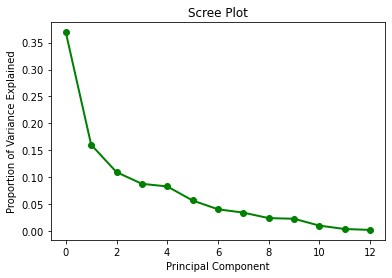

In [40]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=13)
X_r1 = pca.fit(df_zscore).transform(df_zscore)
pc = list(range(1,14))
pc.reverse()
# plt.plot(pc, pca.explained_variance_ratio_, 'ro-', linewidth=2 , color ="green")
plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2 , color ="green") # I think this should be more correct (TODO: make sure about this)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

#### This plot shows the variance of each component. 

PCA explained variance ratio:
0.37 0.16 0.11 0.09 0.08 0.06 0.04 0.03 0.02 0.02 0.01 0.00 0.00 
PCA cumulative explained variance ratio:
0.37 0.53 0.64 0.73 0.81 0.87 0.91 0.94 0.96 0.99 0.99 1.00 1.00 


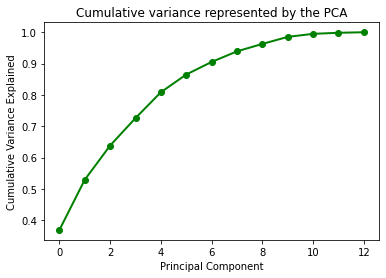

In [41]:
pca_explained_variance_ratio = pca.explained_variance_ratio_
print('PCA explained variance ratio:')
for item in pca_explained_variance_ratio:
    print("%.2f" % item, end=' ')
print()

cumulative_explained_variance = [sum(pca_explained_variance_ratio[:i+1]) 
                                 for i in range(len(pca_explained_variance_ratio))]
print('PCA cumulative explained variance ratio:')
for item in cumulative_explained_variance:
    print("%.2f" % item, end=' ')
print()

plt.plot(cumulative_explained_variance, 'ro-', linewidth=2 , color ="green")
plt.title('Cumulative variance represented by the PCA')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()

#### Based on the above plot, it seems reasonable to pick the first 10 PCA eigenvectors as the reduced features as thery can explain 96%, and the line get less stip at 10  components.

In [42]:
X_r1.shape
selected_PCA_features = X_r1[:, 0:10]
selected_PCA_features.shape

(1380, 10)

#### Plotting the dataset for the first pca vectors. 

In [43]:
# Plot the datapoints, or a useful subset of them (select out one day per state? or use color by State?)
# on the first two PCA and LDA feature vectors.

df_r1 = pd.DataFrame(X_r1)
frames = [df, df_r1]
df_concat = pd.concat(frames, axis=1)
df_concat.head()

,Day,State_ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,...,3,4,5,6,7,8,9,10,11,12
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,...,0.500558,-0.164249,-1.471862,-0.488537,0.818967,-0.510926,-0.219254,0.201927,-0.104472,-0.121987
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,...,3.251612,2.895423,-0.207744,-0.194189,0.679317,-0.206408,-0.102733,0.541882,-0.252132,-0.099653
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,...,0.994413,0.888601,-1.087502,-0.495311,-0.648062,0.387475,-0.074757,-0.111978,0.034549,0.125156
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,...,0.817631,0.074648,-1.482096,-0.475832,0.049176,-0.823337,-0.480330,0.075601,-0.008455,-0.039765
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,...,1.355098,2.561539,-0.121043,0.625551,0.315190,-0.269542,-0.070591,-0.000330,-0.079349,0.180707


In [44]:
df_concat.columns

Index([                            'Day',                        'State_ID',
                                 'State',                             'Lat',
                                 'Long_',                          'Active',
                         'Incident_Rate',              'Total_Test_Results',
                   'Case_Fatality_Ratio',                    'Testing_Rate',
       'Resident_Population_2020_Census',  'Population_Density_2020_Census',
              'Density_Rank_2020_Census',                        'SexRatio',
                             'Confirmed',                          'Deaths',
                             'Recovered',                                 0,
                                       1,                                 2,
                                       3,                                 4,
                                       5,                                 6,
                                       7,                                 8,

<AxesSubplot:title={'center':'The first PCA component of different states'}, xlabel='State_ID'>

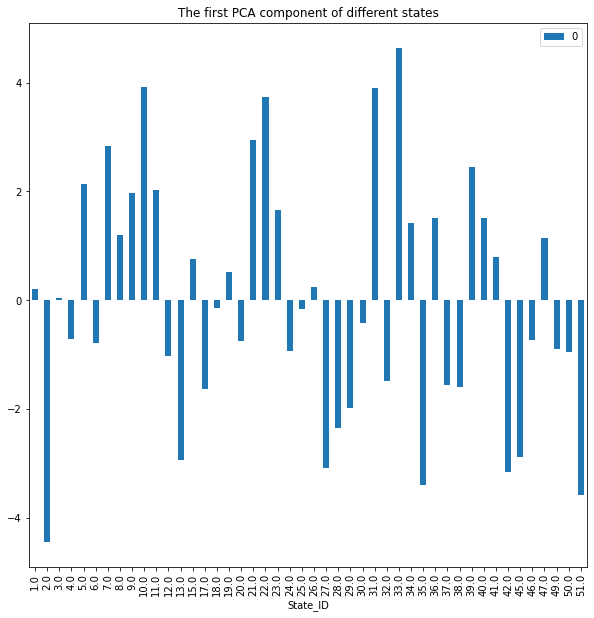

In [45]:
# df_concat_states = df_concat.groupby('State').apply(lambda df: df.sample(1))
# df_concat_states.plot(x='State', y=0, kind='bar', title='The first PCA component of different states', figsize=(10, 10))

df_mean_states = df_concat.groupby('State').apply(lambda df: df.mean(axis=0))
df_mean_states.plot(x='State_ID', y=0, kind='bar', title='The first PCA component of different states', figsize=(10, 10))

<AxesSubplot:title={'center':'The second PCA component of different states'}, xlabel='State_ID'>

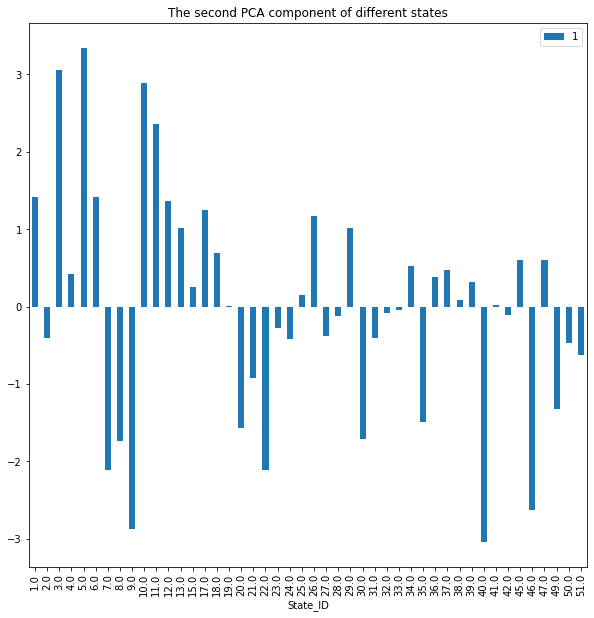

In [46]:
# df_concat_states.plot(x='State', y=1, kind='bar', title='The second PCA component of different states', figsize=(10, 10))
df_mean_states.plot(x='State_ID', y=1, kind='bar', title='The second PCA component of different states', figsize=(10, 10))

### LDA: 
#### As using LDA method, we need the lables to maximize the between scatter and minimize the between scatter of each class, the first part used "Recovered" as labels and in next box we used 'Deaths" and "Confirmed".
#### Measures regarding LDA transform such as accuracy,recall, precison, is also reported for all labels. 

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(df_zscore,Y).transform(df_zscore)

# print(lda.explained_variance_ratio_)
# print(lda.predict([df_zscore.to_numpy()[0,:]]))

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, df_zscore, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('label = recovered > lda mean cross validation accuracy:', np.mean(scores))   
scores = cross_val_score(lda, df_zscore, Y, scoring='recall', cv=cv, n_jobs=-1)
print('label = recovered > lda mean cross validation recall:', np.mean(scores))
scores = cross_val_score(lda, df_zscore, Y, scoring='precision', cv=cv, n_jobs=-1)
print('label = recovered > lda mean cross validation precision:', np.mean(scores))   
scores = cross_val_score(lda, df_zscore, Y, scoring='f1', cv=cv, n_jobs=-1)
print('label = recovered > lda mean cross validation f1:', np.mean(scores))   

lda mean cross validation accuracy: 0.7391304347826086
lda mean cross validation recall: 0.78813151563753
lda mean cross validation precision: 0.7939775557465067
lda mean cross validation f1: 0.7904484751833345


In [201]:
# LDA with other labels:

X_r2_confirmed = lda.fit(df_zscore,Y_confirmed).transform(df_zscore)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, df_zscore, Y_confirmed, scoring='accuracy', cv=cv, n_jobs=-1)
print('label = confirmed > lda mean cross validation accuracy:', np.mean(scores))
scores = cross_val_score(lda, df_zscore, Y_confirmed, scoring='recall', cv=cv, n_jobs=-1)
print('label = confirmed > lda mean cross validation recall:', np.mean(scores))   
scores = cross_val_score(lda, df_zscore, Y_confirmed, scoring='precision', cv=cv, n_jobs=-1)
print('label = confirmed > lda mean cross validation precision:', np.mean(scores))   
scores = cross_val_score(lda, df_zscore, Y_confirmed, scoring='f1', cv=cv, n_jobs=-1)
print('label = confirmed > lda mean cross validation f1:', np.mean(scores))   
print('---------------------------')

X_r2_deaths = lda.fit(df_zscore,Y_deaths).transform(df_zscore)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, df_zscore, Y_deaths, scoring='accuracy', cv=cv, n_jobs=-1)
print('label = deaths > lda mean cross validation accuracy:', np.mean(scores))   
scores = cross_val_score(lda, df_zscore, Y_deaths, scoring='recall', cv=cv, n_jobs=-1)
print('label = deaths > lda mean cross validation recall:', np.mean(scores))   
scores = cross_val_score(lda, df_zscore, Y_deaths, scoring='precision', cv=cv, n_jobs=-1)
print('label = deaths > lda mean cross validation precision:', np.mean(scores))   
scores = cross_val_score(lda, df_zscore, Y_deaths, scoring='f1', cv=cv, n_jobs=-1)
print('label = deaths > lda mean cross validation f1:', np.mean(scores))   

label = confirmed > lda mean cross validation accuracy: 0.9630434782608693
label = confirmed > lda mean cross validation recall: 1.0
label = confirmed > lda mean cross validation precision: 0.9630434782608693
label = confirmed > lda mean cross validation f1: 0.9811726117261175
---------------------------
label = deaths > lda mean cross validation accuracy: 0.892512077294686
label = deaths > lda mean cross validation recall: 0.9643763440860215
label = deaths > lda mean cross validation precision: 0.9204004891852623
label = deaths > lda mean cross validation f1: 0.9417089709699848


#### Based on the above result, LDA does better in predicting the 'confirmed' label, since it has higher accuracy.

#### Next, we plot the first component of LDA for the datset. 

In [159]:
# Plot the datapoints, or a useful subset of them (select out one day per state? or use color by State?)
# on the first two PCA and LDA feature vectors.

df_r2 = pd.DataFrame(X_r2)
frames = [df, df_r2]
df_concat_r2 = pd.concat(frames, axis=1)
df_concat_r2.head()

,Day,State_ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident_Population_2020_Census,Population_Density_2020_Census,Density_Rank_2020_Census,SexRatio,Confirmed,Deaths,Recovered,0
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,5024279,99.2,29,94,1,0,0,-1.501289
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,733391,1.3,52,109,1,1,0,-1.939495
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,7151502,62.9,35,99,1,1,1,-1.249137
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,3011524,57.9,36,96,1,1,1,-1.149070
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,39538223,253.7,13,99,1,1,0,-2.375195


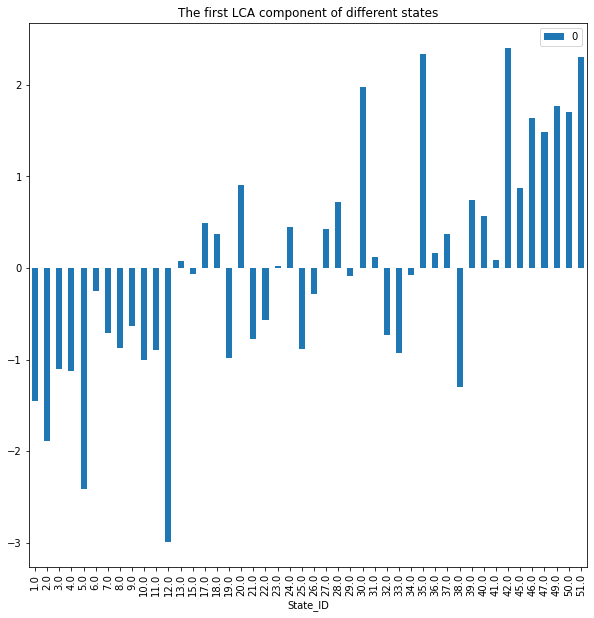

In [160]:
df_mean_states = df_concat_r2.groupby('State').apply(lambda df: df.mean(axis=0))
df_mean_states.plot(x='State_ID', y=0, kind='bar', title='The first LCA component of different states', figsize=(10, 10))

# Decision Tree:
#### A decision tree with different depth is implemented using sklearn package with 5-fold validation.
#### This part the data used is the original data(without PCA, LDA, normalization) and the label is "Recovered" cases.
#### The goal is to find the best depth possible among [none,3,5,10]
#### For plotting, we showed "none" as "0" in graphs

the best k: 10
0.9188405797101449
<generator object _BaseKFold.split at 0x7ffafa5feeb0>


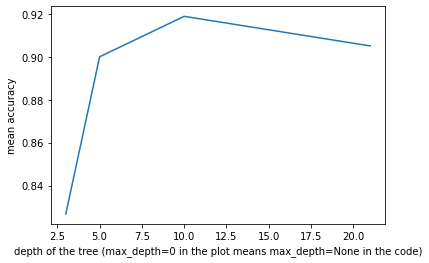

the score of the best decision tree on the train data: 0.9797101449275363


In [48]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y)
k = [3,5,10, None]
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 5])

last_tree_depth = 0
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y[train_index], Y[test_index]
        decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k[i])
        decision_tree = decision_tree.fit(X_train_fold, y_train_fold)
        acc[i,j] = decision_tree.score(X_validation, y_validation)
        j +=1
        
        if i == len(k) - 1:  # last iteration of the for
            last_tree_depth = decision_tree.tree_.max_depth
        
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))

print(kf.split(X_train))
# k_new for plotting:
k_new = [3,5,10, 0]  # instead of [None, 3,5,10] 
k_new[3] = last_tree_depth

k_best = k[k_max_index]
plt.plot(k_new, acc.sum(axis = 1 )/5)
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.show()

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k_best)
decision_tree = decision_tree.fit(X_train, Y)
print ('the score of the best decision tree on the train data:', decision_tree.score(X_train, Y))

#### The best depth is 10, that gives the accuracy of 97% on the training set (without pca,lda,and normalization).

#### We plotted the var and mean for each depth tested above. 

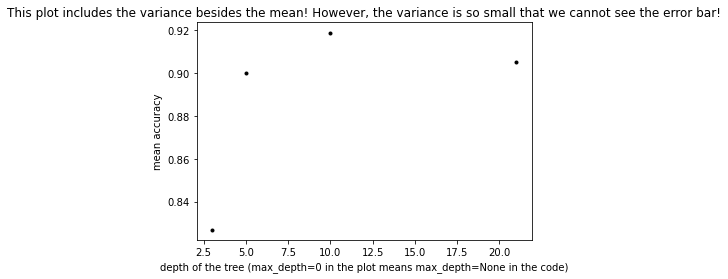

In [49]:
# This plot includes the variance besides the mean! However, the variance is so small that we can't see the error bar!

plt.figure()
plt.errorbar(k_new, acc.sum(axis = 1 )/5, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we cannot see the error bar!')
plt.show()

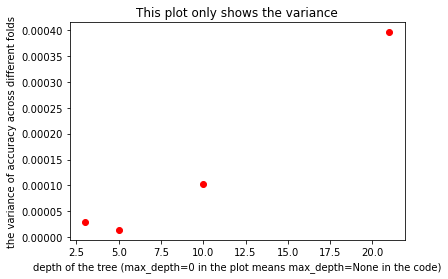

In [50]:
# This plot only shows the variance

plt.figure()
plt.errorbar(k_new, np.var(acc, axis=1), fmt='ro')
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('the variance of accuracy across different folds')
plt.title('This plot only shows the variance')
plt.show()

#### In this part, we tried to visulize the best depth for decision tree and extract patterns in data. 

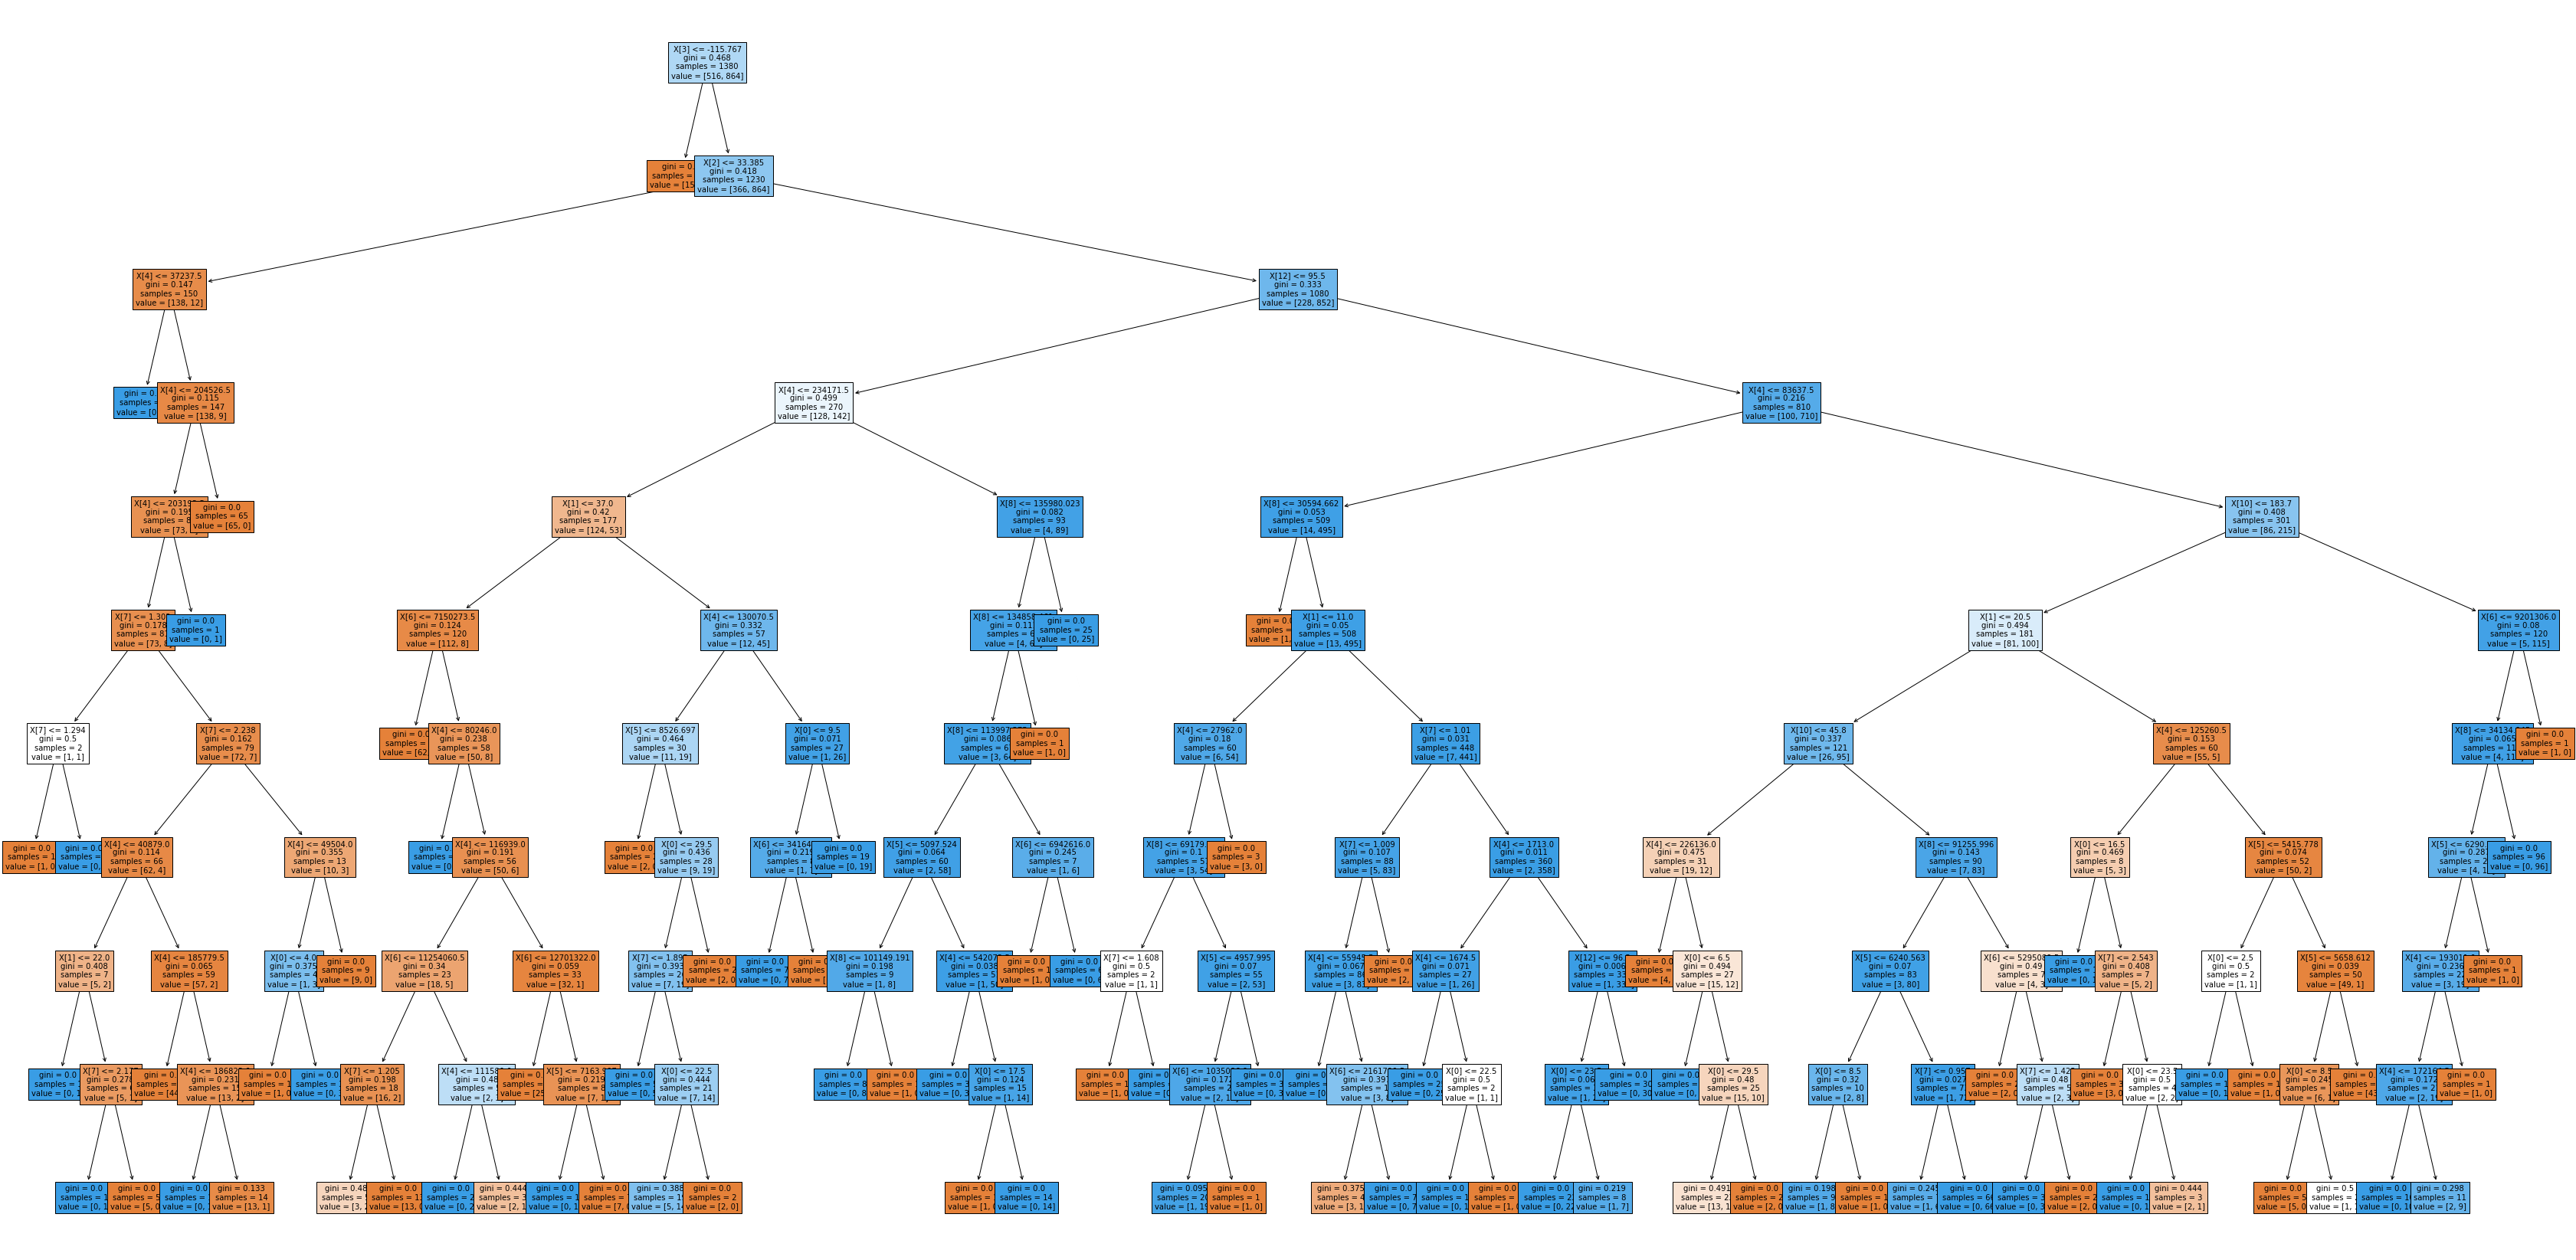

In [53]:
# Examining the final resulting splitting rules used for the trees. 
# Todo: Do they indicate any interesting patterns that explain the data?

from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(60, 30))
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k_best).fit(X_train, Y)
plot_tree(decision_tree, filled=True, fontsize=10)
plt.savefig('decision_tree_rules.png')
plt.show()

####  Altought k_best = 10, it is easier to examine the decision tree rules with k = 4

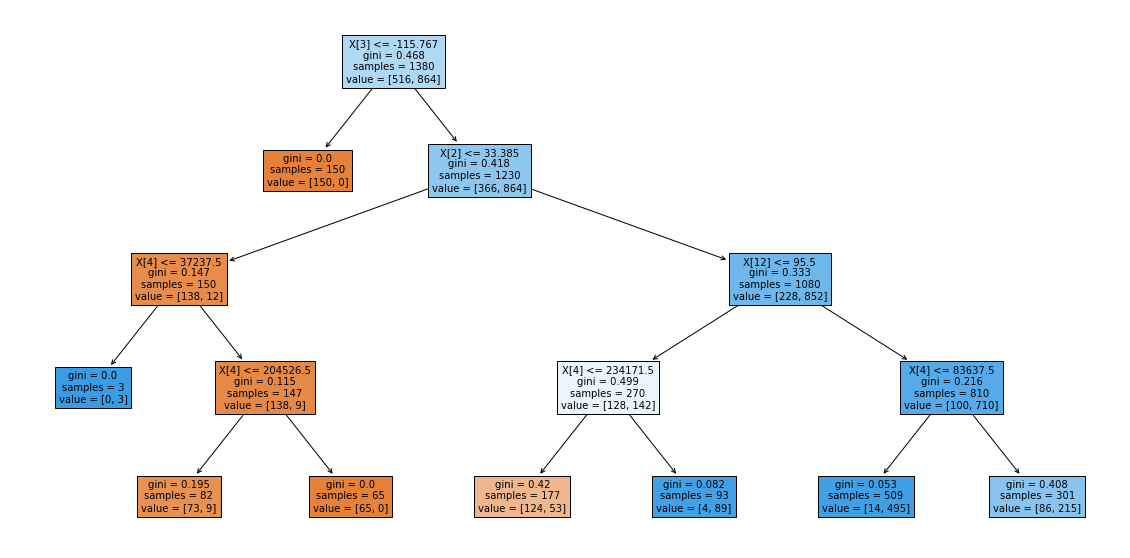

In [164]:
# Altought k_best = 10, it is easier to examine the decision tree rules with k = 4

plt.figure(figsize=(20, 10))
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, Y)
plot_tree(decision_tree, filled=True, fontsize=10)
plt.savefig('decision_tree_rules_k=4.png')
plt.show()

## Decision tree on PCA features:
#### For this part, we applied the PCA transform on the training data and trained the decision tree with 5-fold validation to find the best depth for the tree among [none, 3, 5, 10]

the best k: 5
0.8804347826086957
<generator object _BaseKFold.split at 0x7ffaf880c200>


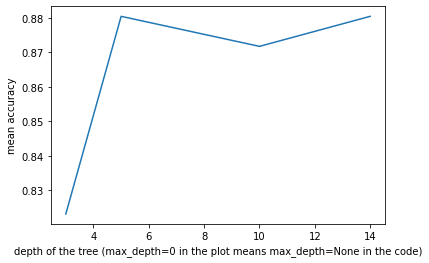

the score of the best decision tree on the train data: 0.9065217391304348


In [54]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y)
k = [3,5,10, None]
X_train = selected_PCA_features
acc = np.zeros([len(k) , 5])

last_tree_depth = 0
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y[train_index], Y[test_index]
        decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k[i])
        decision_tree = decision_tree.fit(X_train_fold, y_train_fold)
        acc[i,j] = decision_tree.score(X_validation, y_validation)
        j +=1
        
        if i == len(k) - 1:  # last iteration of the for
            last_tree_depth = decision_tree.tree_.max_depth
        
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))

print(kf.split(X_train))
# k_new for plotting:
k_new = [3,5,10, 0]  # instead of [None, 3,5,10]
k_new[3] = last_tree_depth

k_best = k[k_max_index]
plt.plot(k_new, acc.sum(axis = 1 )/5)
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.show()

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k_best)
decision_tree = decision_tree.fit(X_train, Y)
print ('the score of the best decision tree on the train data:', decision_tree.score(X_train, Y))

#### The best depth in this case is 5. However, when we compare the result( accuracy) of the model with the previous one(without pca analysis) we see that PCA has decreased the acuucary. This is what we expexted, PCA does not work well on decisio trees.
#### Based on the above result, decision tree works better on the original dataset

### The above results was predicting the 'Recoverd' label. We now repeat the steps for using decsion tree for predicting the 'Deaths' and 'Confirmed' labels:

### A. the 'Deaths' label:
#### using 5-fold cross-validation to find the best depth of the decision tree model.
#### The data used in this part is the original data without normalization and pca or lda analysis.

the best k: 3
0.905072463768116
<generator object _BaseKFold.split at 0x7faa78808dd0>


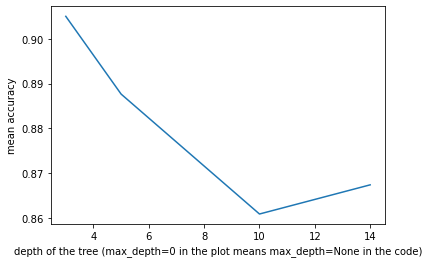

the score of the best decision tree on the train data: 0.9195652173913044


In [302]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_deaths)
k = [3,5,10, None]
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 5])

last_tree_depth = 0
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_deaths[train_index], Y_deaths[test_index]
        decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k[i])
        decision_tree = decision_tree.fit(X_train_fold, y_train_fold)
        acc[i,j] = decision_tree.score(X_validation, y_validation)
        j +=1
        
        if i == len(k) - 1:  # last iteration of the for
            last_tree_depth = decision_tree.tree_.max_depth
        
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))

print(kf.split(X_train))
# k_new for plotting:
k_new = [3,5,10, 0]  # instead of [None, 3,5,10]
k_new[3] = last_tree_depth

k_best = k[k_max_index]
plt.plot(k_new, acc.sum(axis = 1 )/5)
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.show()

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k_best)
decision_tree = decision_tree.fit(X_train, Y_deaths)
print ('the score of the best decision tree on the train data:', decision_tree.score(X_train, Y_deaths))

#### The best depth is 3 with the accuracy of 91%.

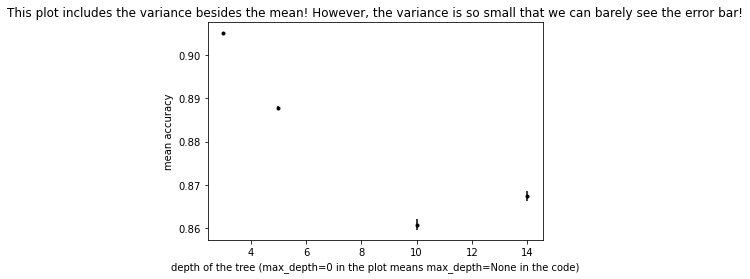

In [298]:
# This plot includes the variance besides the mean! However, the variance is so small that we barely see the error bar!

plt.figure()
plt.errorbar(k_new, acc.sum(axis = 1 )/5, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we can barely see the error bar!')
plt.show()

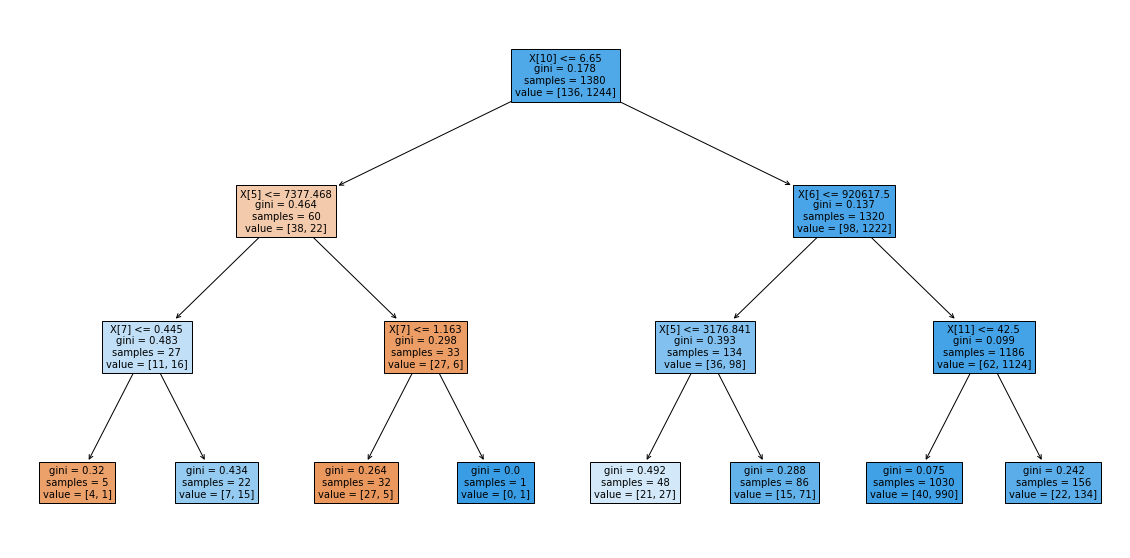

In [303]:
plt.figure(figsize=(20, 10))
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, Y_deaths)
plot_tree(decision_tree, filled=True, fontsize=10)
plt.savefig('decision_tree_rules_deaths_k=3.png')
plt.show()

## Decision tree on PCA features: "Deaths" label

the best k: 3
0.905072463768116
<generator object _BaseKFold.split at 0x7ffaf8558eb0>


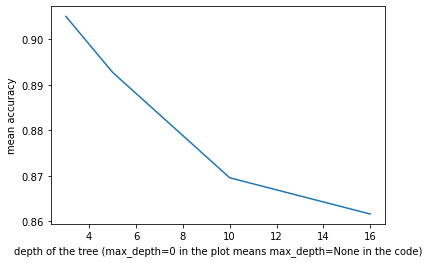

the score of the best decision tree on the train data: 0.6318840579710145


In [119]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_deaths)
k = [3,5,10, None]
X_train = selected_PCA_features
acc = np.zeros([len(k) , 5])

last_tree_depth = 0
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_deaths[train_index], Y_deaths[test_index]
        decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k[i])
        decision_tree = decision_tree.fit(X_train_fold, y_train_fold)
        acc[i,j] = decision_tree.score(X_validation, y_validation)
        j +=1
        
        if i == len(k) - 1:  # last iteration of the for
            last_tree_depth = decision_tree.tree_.max_depth
        
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))

print(kf.split(X_train))
# k_new for plotting:
k_new = [3,5,10, 0]  # instead of [None, 3,5,10]
k_new[3] = last_tree_depth

k_best = k[k_max_index]
plt.plot(k_new, acc.sum(axis = 1 )/5)
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.show()

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k_best)
decision_tree = decision_tree.fit(X_train, Y)
print ('the score of the best decision tree on the train data:', decision_tree.score(X_train, Y_deaths))

#### As compared to the decision tree without applying pca for "death" labels, this model is slightly weaker.

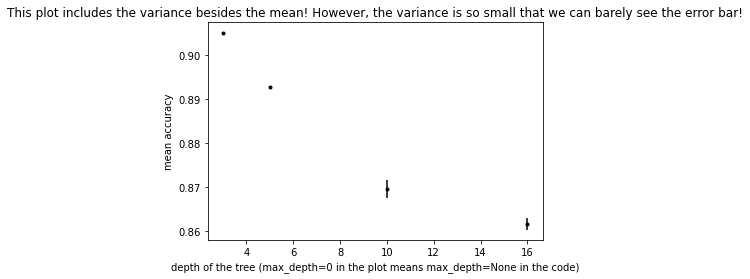

In [120]:
# This plot includes the variance besides the mean! However, the variance is so small that we barely see the error bar!

plt.figure()
plt.errorbar(k_new, acc.sum(axis = 1 )/5, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we can barely see the error bar!')
plt.show()

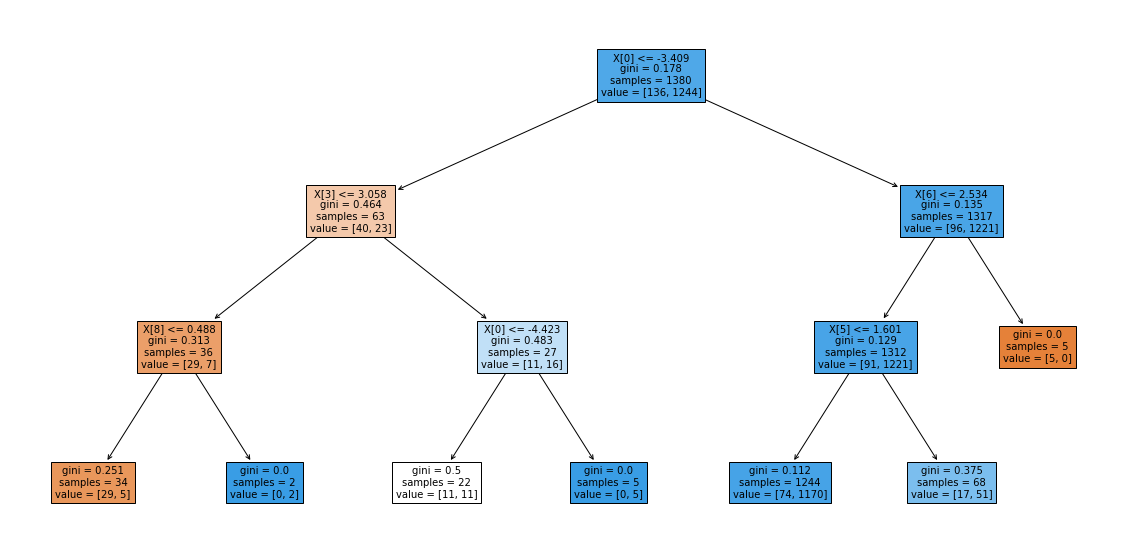

In [121]:
plt.figure(figsize=(20, 10))
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, Y_deaths)
plot_tree(decision_tree, filled=True, fontsize=10)
plt.savefig('decision_tree_rules_deaths_k=3.png')
plt.show()

### B. the 'Confirmed' label:
#### using 5-fold cross-validation to find the best depth of the decision tree model.
#### The data used in this part is the original data without normalization and pca or lda analysis.

the best k: 5
0.9630434782608696


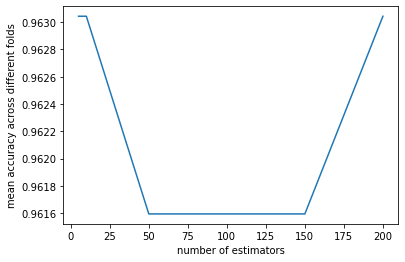

In [122]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_confirmed)
k = [5, 10, 50, 150, 200] # number of estimators
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 5])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_confirmed[train_index], Y_confirmed[test_index]
        clf = GradientBoostingClassifier(n_estimators = k[i])
        clf = clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))
k_best = k[k_max_index]
plt.plot(k, acc.sum(axis = 1 )/5)
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy across different folds')
plt.show()

the best k: 3
0.9630434782608696
<generator object _BaseKFold.split at 0x7ffaf8728660>


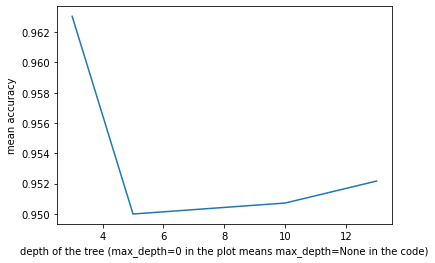

the score of the best decision tree on the train data: 0.9644927536231884


In [123]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_confirmed)
k = [3,5,10, None]
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 5])

last_tree_depth = 0
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_confirmed[train_index], Y_confirmed[test_index]
        decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k[i])
        decision_tree = decision_tree.fit(X_train_fold, y_train_fold)
        acc[i,j] = decision_tree.score(X_validation, y_validation)
        j +=1
        
        if i == len(k) - 1:  # last iteration of the for
            last_tree_depth = decision_tree.tree_.max_depth
        
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))

print(kf.split(X_train))
# k_new for plotting:
k_new = [3,5,10, 0]  # instead of [None, 3,5,10]
k_new[3] = last_tree_depth

k_best = k[k_max_index]
plt.plot(k_new, acc.sum(axis = 1 )/5)
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.show()

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k_best)
decision_tree = decision_tree.fit(X_train, Y_confirmed)
print ('the score of the best decision tree on the train data:', decision_tree.score(X_train, Y_confirmed))

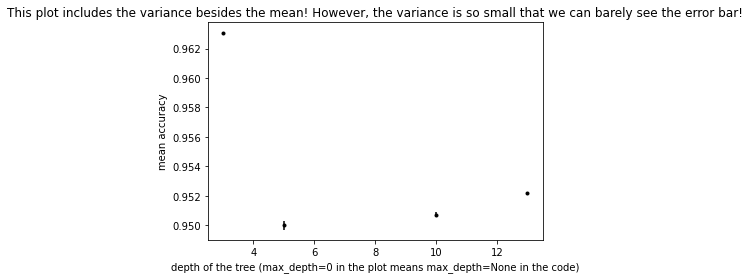

In [124]:
# This plot includes the variance besides the mean! However, the variance is so small that we barely see the error bar!

plt.figure()
plt.errorbar(k_new, acc.sum(axis = 1 )/5, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we can barely see the error bar!')
plt.show()

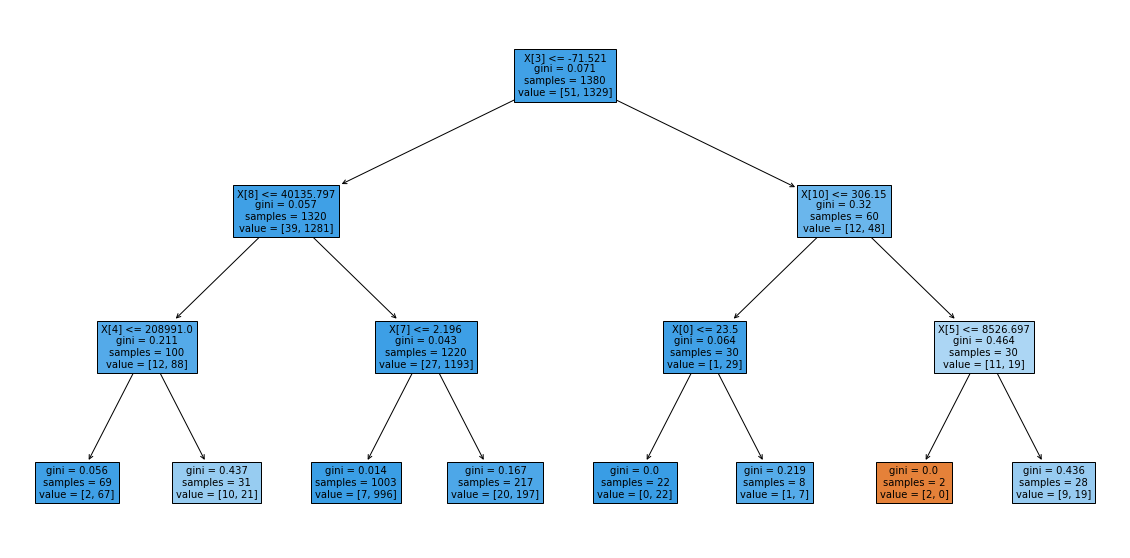

In [305]:
plt.figure(figsize=(20, 10))
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, Y_confirmed)
plot_tree(decision_tree, filled=True, fontsize=10)
plt.savefig('decision_tree_rules_deaths_k=3.png')
plt.show()

## Decision tree on PCA features: "Confirmed" label

the best k: 3
0.9521739130434781
<generator object _BaseKFold.split at 0x7ffaf83ab7b0>


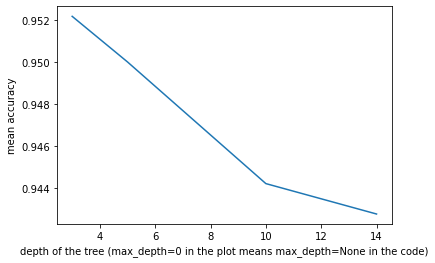

the score of the best decision tree on the train data: 0.6572463768115943


In [112]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_confirmed)
k = [3,5,10, None]
X_train = selected_PCA_features
acc = np.zeros([len(k) , 5])

last_tree_depth = 0
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_confirmed[train_index], Y_confirmed[test_index]
        decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k[i])
        decision_tree = decision_tree.fit(X_train_fold, y_train_fold)
        acc[i,j] = decision_tree.score(X_validation, y_validation)
        j +=1
        
        if i == len(k) - 1:  # last iteration of the for
            last_tree_depth = decision_tree.tree_.max_depth
        
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))

print(kf.split(X_train))
# k_new for plotting:
k_new = [3,5,10, 0]  # instead of [None, 3,5,10]
k_new[3] = last_tree_depth

k_best = k[k_max_index]
plt.plot(k_new, acc.sum(axis = 1 )/5)
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.show()

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=k_best)
decision_tree = decision_tree.fit(X_train, Y)
print ('the score of the best decision tree on the train data:', decision_tree.score(X_train, Y_confirmed))

#### We observe that applying PCA on the dataset reduces the accuracy of the model on the with "Confirmed" labels compared to the model without PCA.

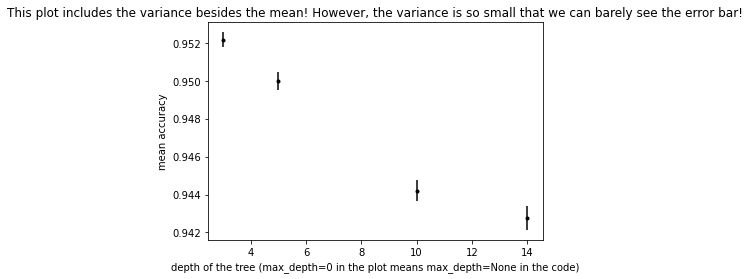

In [113]:
# This plot includes the variance besides the mean! However, the variance is so small that we barely see the error bar!

plt.figure()
plt.errorbar(k_new, acc.sum(axis = 1 )/5, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('depth of the tree (max_depth=0 in the plot means max_depth=None in the code)')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we can barely see the error bar!')
plt.show()

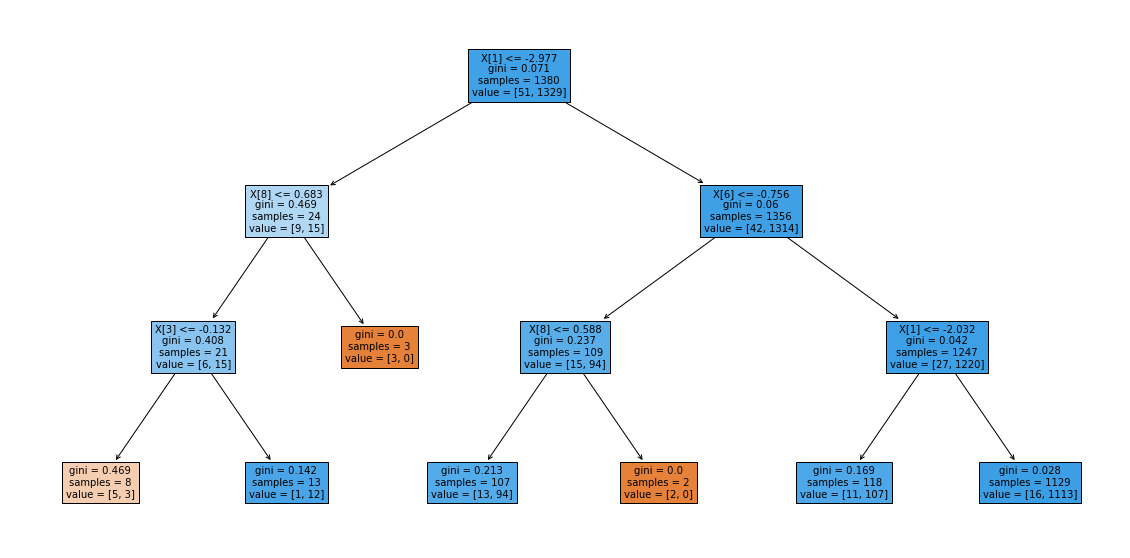

In [115]:
plt.figure(figsize=(20, 10))
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, Y_confirmed)
plot_tree(decision_tree, filled=True, fontsize=10)
plt.savefig('decision_tree_rules_confirmed_pca_k=3.png')
plt.show()

# Random Forest:
#### Using 5-fold cross validation, we aim to find the best parametres for the random forest among
#### • number of trees: {5, 10, 50, 150, 200}
#### • max depth: {3, 5, 10, None}

In [134]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
kf = KFold(n_splits=5)
kf.get_n_splits(Y)
k1 = [3,5,10, None] # depth of trees
k2 = [5, 10, 50, 150, 200] # number of trees
X_train = df_cp. to_numpy()
acc = np.zeros([len(k1),len(k2) , 5])
for i in range(len(k1)):
    for e in range(len(k2)):
        j = 0
        for train_index, test_index in kf.split(X_train): 
            X_train_fold, X_validation = X_train[train_index], X_train[test_index]
            y_train_fold, y_validation = Y[train_index], Y[test_index]
            clf = RandomForestClassifier(random_state=0 , max_depth=k1[i] , n_estimators = k2[e])
            clf = clf.fit(X_train_fold, y_train_fold)
            acc[i,e,j] = clf.score(X_validation, y_validation)
            j +=1
#k_max_inedx =  np.argmax(acc.sum(axis = 2 )/5)  
# print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 2 )/5))
print(acc.sum(axis = 2 )/5)
k_max_index = np.argmax(acc.sum(axis = 2 )/5 ) 
print("1D index is: " , k_max_index)
k1_best = k1[k_max_index // 5] 
k2_best = k2[k_max_index % 5]
print("k1_best" , k1_best)
print("k2_best" , k2_best)

0.9369565217391305
[[0.85144928 0.85289855 0.88913043 0.88768116 0.88405797]
 [0.91521739 0.92318841 0.93115942 0.93478261 0.93188406]
 [0.92898551 0.93333333 0.93478261 0.93550725 0.93478261]
 [0.92681159 0.93405797 0.93478261 0.93695652 0.93405797]]
1D index is:  18
k1_best None
k2_best 150


<Figure size 432x288 with 0 Axes>

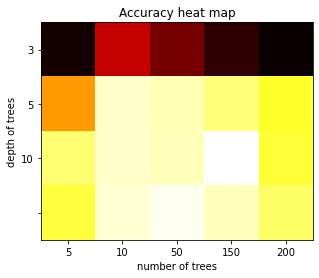

In [135]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# plt.plot(k1,k2, acc.sum(axis = 1 )/5)
# plt.show()

# the plot should be a heat plot
plt.figure()
fig, ax = plt.subplots()
ax.imshow(acc.sum(axis = 1 )/5, cmap='hot', interpolation='nearest')
ax.set_xticks(np.arange(len(k2)))
ax.set_yticks(np.arange(len(k1)))
ax.set_xticklabels(k2)
ax.set_yticklabels(k1)
plt.title('Accuracy heat map')
plt.ylabel('depth of trees')
plt.xlabel('number of trees')
plt.show()

In [136]:
print('The variances of accuracy accross different folds. The variances are pretty low:')
np.var(acc, axis=2)

The variances of accuracy accross different folds. The variances are pretty low:


array([[3.67569838e-04, 5.80760344e-04, 9.24175593e-05, 1.89035917e-04,
        5.25099769e-05],
       [3.91724428e-04, 6.51123714e-05, 8.40159630e-05, 2.10039908e-05,
        1.28124344e-04],
       [5.56605755e-05, 3.99075824e-05, 4.20079815e-05, 2.83553875e-05,
        3.67569838e-05],
       [7.56143667e-05, 3.36063852e-05, 1.57529931e-05, 2.94055871e-05,
        1.78533921e-05]])

## Random Forest on PCA features:

1D index is:  14
[[0.79782609 0.81086957 0.83623188 0.84057971 0.8442029 ]
 [0.91449275 0.90362319 0.90652174 0.91086957 0.91231884]
 [0.91811594 0.92028986 0.92246377 0.92463768 0.92536232]
 [0.91231884 0.90942029 0.92246377 0.92536232 0.92391304]]
0.9253623188405797
k1_best 10
k2_best 200


<Figure size 432x288 with 0 Axes>

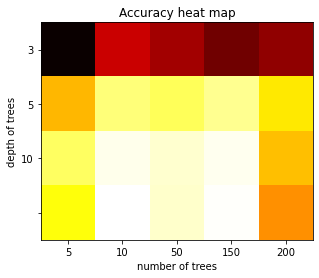

In [137]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
kf = KFold(n_splits=5)
kf.get_n_splits(Y)
k1 = [3,5,10, None] # depth of trees
k2 = [5, 10, 50, 150, 200] # number of trees
X_train = selected_PCA_features
acc = np.zeros([len(k1),len(k2) , 5])
for i in range(len(k1)):
    for e in range(len(k2)):
        j = 0
        for train_index, test_index in kf.split(X_train): 
            X_train_fold, X_validation = X_train[train_index], X_train[test_index]
            y_train_fold, y_validation = Y[train_index], Y[test_index]
            clf = RandomForestClassifier(random_state=0 , max_depth=k1[i] , n_estimators = k2[e])
            clf = clf.fit(X_train_fold, y_train_fold)
            acc[i,e,j] = clf.score(X_validation, y_validation)
            j +=1
k1_max =  np.argmax(acc.sum(axis = 2 )/5)  
print("1D index is: ", np.argmax(acc.sum(axis = 2 )/5))
print(acc.sum(axis = 2 )/5)
#print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 2 )/5))
#k_best = k[k_max_index]
k1_best = k1[k1_max// 5] 
k2_best = k2[k1_max % 5]
print("k1_best" , k1_best)
print("k2_best" , k2_best)

# the plot should be a heat plot
plt.figure()
fig, ax = plt.subplots()
ax.imshow(acc.sum(axis = 1 )/5, cmap='hot', interpolation='nearest')
ax.set_xticks(np.arange(len(k2)))
ax.set_yticks(np.arange(len(k1)))
ax.set_xticklabels(k2)
ax.set_yticklabels(k1)
plt.title('Accuracy heat map')
plt.ylabel('depth of trees')
plt.xlabel('number of trees')
plt.show()

#### Based on the above results, random forest works slightly better on the original dataset

### The above results was predicting the 'Recoverd' label. We now repeat the steps for using random forest for predicting the 'Deaths' and 'Confirmed' labels:

### A. the 'Deaths' label:

In [140]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
kf = KFold(n_splits=5)
kf.get_n_splits(Y_deaths)
k1 = [3,5,10, None] # depth of trees
k2 = [5, 10, 50, 150, 200] # number of trees
X_train = df_cp. to_numpy()
acc = np.zeros([len(k1),len(k2) , 5])
for i in range(len(k1)):
    for e in range(len(k2)):
        j = 0
        for train_index, test_index in kf.split(X_train): 
            X_train_fold, X_validation = X_train[train_index], X_train[test_index]
            y_train_fold, y_validation = Y_deaths[train_index], Y_deaths[test_index]
            clf = RandomForestClassifier(random_state=0 , max_depth=k1[i] , n_estimators = k2[e])
            clf = clf.fit(X_train_fold, y_train_fold)
            acc[i,e,j] = clf.score(X_validation, y_validation)
            j +=1
k1_max =  np.argmax(acc.sum(axis = 2 )/5)  
print('the best k in 1D:', k1_max)  
print(acc.sum(axis = 2 )/5)
print(np.max(acc.sum(axis = 2 )/5))
k1_best = k1[k1_max// 5] 
k2_best = k2[k1_max % 5]
print("k1_best" , k1_best)
print("k2_best" , k2_best)


the best k in 1D: 2
[[0.9057971  0.90652174 0.91304348 0.91014493 0.90724638]
 [0.89855072 0.89710145 0.90507246 0.90217391 0.9057971 ]
 [0.89492754 0.88768116 0.89130435 0.88985507 0.88913043]
 [0.89057971 0.8826087  0.88405797 0.88405797 0.88333333]]
0.9130434782608695
k1_best 3
k2_best 50


<Figure size 432x288 with 0 Axes>

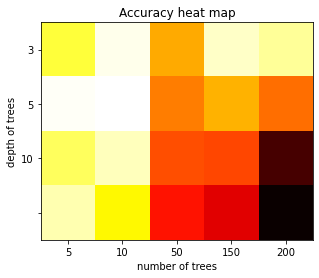

In [141]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# plt.plot(k1,k2, acc.sum(axis = 1 )/5)
# plt.show()

# the plot should be a heat plot
plt.figure()
fig, ax = plt.subplots()
ax.imshow(acc.sum(axis = 1 )/5, cmap='hot', interpolation='nearest')
ax.set_xticks(np.arange(len(k2)))
ax.set_yticks(np.arange(len(k1)))
ax.set_xticklabels(k2)
ax.set_yticklabels(k1)
plt.title('Accuracy heat map')
plt.ylabel('depth of trees')
plt.xlabel('number of trees')
plt.show()

In [142]:
print('The variances of accuracy accross different folds. The variances are pretty low:')
np.var(acc, axis=2)

The variances of accuracy accross different folds. The variances are pretty low:


array([[7.87649653e-05, 5.98613737e-05, 8.92669607e-05, 8.08653644e-05,
        9.76685570e-05],
       [2.94055871e-04, 1.60680529e-04, 1.22873346e-04, 2.46796891e-04,
        1.41776938e-04],
       [1.05019954e-04, 3.09808864e-04, 4.56836799e-04, 6.12266331e-04,
        6.17517328e-04],
       [3.53917244e-04, 1.60680529e-04, 5.93362739e-04, 5.67107750e-04,
        5.84961143e-04]])

## Random Forest on PCA features for "Deaths" label:

1D index is:  0
[[0.90869565 0.90434783 0.90289855 0.90724638 0.90652174]
 [0.90289855 0.90144928 0.90362319 0.90652174 0.90724638]
 [0.88768116 0.89057971 0.89927536 0.89927536 0.89927536]
 [0.88985507 0.88333333 0.88913043 0.88333333 0.88695652]]
0.9086956521739129
k1_best 3
k2_best 5


<Figure size 432x288 with 0 Axes>

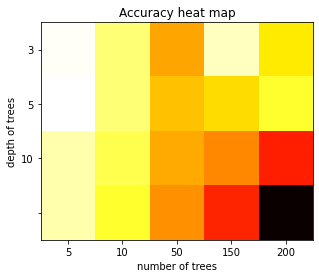

In [144]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
kf = KFold(n_splits=5)
kf.get_n_splits(Y_deaths)
k1 = [3,5,10, None] # depth of trees
k2 = [5, 10, 50, 150, 200] # number of trees
X_train = selected_PCA_features
acc = np.zeros([len(k1),len(k2) , 5])
for i in range(len(k1)):
    for e in range(len(k2)):
        j = 0
        for train_index, test_index in kf.split(X_train): 
            X_train_fold, X_validation = X_train[train_index], X_train[test_index]
            y_train_fold, y_validation = Y_deaths[train_index], Y_deaths[test_index]
            clf = RandomForestClassifier(random_state=0 , max_depth=k1[i] , n_estimators = k2[e])
            clf = clf.fit(X_train_fold, y_train_fold)
            acc[i,e,j] = clf.score(X_validation, y_validation)
            j +=1
k1_max =  np.argmax(acc.sum(axis = 2 )/5)  
print("1D index is: ", np.argmax(acc.sum(axis = 2 )/5))
print(acc.sum(axis = 2 )/5)
#print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 2 )/5))
#k_best = k[k_max_index]
k1_best = k1[k1_max// 5] 
k2_best = k2[k1_max % 5]
print("k1_best" , k1_best)
print("k2_best" , k2_best)

# the plot should be a heat plot
plt.figure()
fig, ax = plt.subplots()
ax.imshow(acc.sum(axis = 1 )/5, cmap='hot', interpolation='nearest')
ax.set_xticks(np.arange(len(k2)))
ax.set_yticks(np.arange(len(k1)))
ax.set_xticklabels(k2)
ax.set_yticklabels(k1)
plt.title('Accuracy heat map')
plt.ylabel('depth of trees')
plt.xlabel('number of trees')
plt.show()

In [146]:
print('The variances of accuracy accross different folds. The variances are pretty low:')
np.var(acc, axis=2)

The variances of accuracy accross different folds. The variances are pretty low:


array([[1.01869355e-04, 2.02688511e-04, 9.66183575e-05, 8.19155640e-05,
        1.01869355e-04],
       [1.38626339e-04, 9.13673598e-05, 7.14135686e-05, 7.03633690e-05,
        7.66645663e-05],
       [3.15059861e-04, 1.75383323e-04, 1.43877337e-04, 1.01869355e-04,
        1.01869355e-04],
       [2.81453476e-04, 8.26507036e-04, 3.70720437e-04, 5.58706154e-04,
        5.84961143e-04]])

### B. The 'Confirmed' Label:

In [149]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
kf = KFold(n_splits=5)
kf.get_n_splits(Y_confirmed)
k1 = [3,5,10, None] # depth of trees
k2 = [5, 10, 50, 150, 200] # number of trees
X_train = df_cp. to_numpy()
acc = np.zeros([len(k1),len(k2) , 5])
for i in range(len(k1)):
    for e in range(len(k2)):
        j = 0
        for train_index, test_index in kf.split(X_train): 
            X_train_fold, X_validation = X_train[train_index], X_train[test_index]
            y_train_fold, y_validation = Y_confirmed[train_index], Y_confirmed[test_index]
            clf = RandomForestClassifier(random_state=0 , max_depth=k1[i] , n_estimators = k2[e])
            clf = clf.fit(X_train_fold, y_train_fold)
            acc[i,e,j] = clf.score(X_validation, y_validation)
            j +=1
k1_max =  np.argmax(acc.sum(axis = 2 )/5)  
print(np.max(acc.sum(axis = 2 )/5))
print(acc.sum(axis = 2 )/5)
k1_best = k1[k1_max// 5] 
k2_best = k2[k1_max % 5]
print("k1_best" , k1_best)
print("k2_best" , k2_best)

0.9630434782608696
[[0.96304348 0.96304348 0.96304348 0.96304348 0.96304348]
 [0.9615942  0.9615942  0.96304348 0.96304348 0.96304348]
 [0.95942029 0.96304348 0.96304348 0.96304348 0.96304348]
 [0.95652174 0.9615942  0.96304348 0.96304348 0.96304348]]
k1_best 3
k2_best 5


<Figure size 432x288 with 0 Axes>

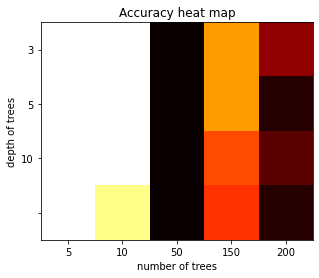

In [150]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# plt.plot(k1,k2, acc.sum(axis = 1 )/5)
# plt.show()

# the plot should be a heat plot
plt.figure()
fig, ax = plt.subplots()
ax.imshow(acc.sum(axis = 1 )/5, cmap='hot', interpolation='nearest')
ax.set_xticks(np.arange(len(k2)))
ax.set_yticks(np.arange(len(k1)))
ax.set_xticklabels(k2)
ax.set_yticklabels(k1)
plt.title('Accuracy heat map')
plt.ylabel('depth of trees')
plt.xlabel('number of trees')
plt.show()

In [151]:
print('The variances of accuracy accross different folds. The variances are pretty low:')
np.var(acc, axis=2)

The variances of accuracy accross different folds. The variances are pretty low:


array([[5.46103760e-05, 5.46103760e-05, 5.46103760e-05, 5.46103760e-05,
        5.46103760e-05],
       [8.19155640e-05, 8.19155640e-05, 5.46103760e-05, 5.46103760e-05,
        5.46103760e-05],
       [9.13673598e-05, 5.46103760e-05, 5.46103760e-05, 5.46103760e-05,
        5.46103760e-05],
       [6.82629700e-05, 8.19155640e-05, 5.46103760e-05, 5.46103760e-05,
        5.46103760e-05]])

## Random Forest on PCA features for "Confirmed" label:

1D index is:  0
[[0.96304348 0.96304348 0.96304348 0.96304348 0.96304348]
 [0.95797101 0.96304348 0.96304348 0.9615942  0.96014493]
 [0.95797101 0.95869565 0.96086957 0.95797101 0.95797101]
 [0.95724638 0.95797101 0.96014493 0.95797101 0.95797101]]
0.9630434782608696
k1_best 3
k2_best 5


<Figure size 432x288 with 0 Axes>

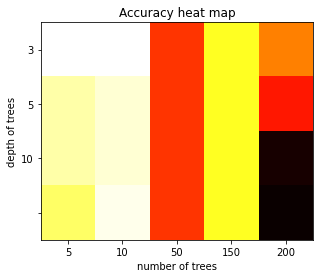

In [154]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
kf = KFold(n_splits=5)
kf.get_n_splits(Y_confirmed)
k1 = [3,5,10, None] # depth of trees
k2 = [5, 10, 50, 150, 200] # number of trees
X_train = selected_PCA_features
acc = np.zeros([len(k1),len(k2) , 5])
for i in range(len(k1)):
    for e in range(len(k2)):
        j = 0
        for train_index, test_index in kf.split(X_train): 
            X_train_fold, X_validation = X_train[train_index], X_train[test_index]
            y_train_fold, y_validation = Y_confirmed[train_index], Y_confirmed[test_index]
            clf = RandomForestClassifier(random_state=0 , max_depth=k1[i] , n_estimators = k2[e])
            clf = clf.fit(X_train_fold, y_train_fold)
            acc[i,e,j] = clf.score(X_validation, y_validation)
            j +=1
k1_max =  np.argmax(acc.sum(axis = 2 )/5)  
print("1D index is: ", np.argmax(acc.sum(axis = 2 )/5))
print(acc.sum(axis = 2 )/5)
#print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 2 )/5))
#k_best = k[k_max_index]
k1_best = k1[k1_max// 5] 
k2_best = k2[k1_max % 5]
print("k1_best" , k1_best)
print("k2_best" , k2_best)

# the plot should be a heat plot
plt.figure()
fig, ax = plt.subplots()
ax.imshow(acc.sum(axis = 1 )/5, cmap='hot', interpolation='nearest')
ax.set_xticks(np.arange(len(k2)))
ax.set_yticks(np.arange(len(k1)))
ax.set_xticklabels(k2)
ax.set_yticklabels(k1)
plt.title('Accuracy heat map')
plt.ylabel('depth of trees')
plt.xlabel('number of trees')
plt.show()

In [155]:
print('The variances of accuracy accross different folds. The variances are pretty low:')
np.var(acc, axis=2)

The variances of accuracy accross different folds. The variances are pretty low:


array([[5.46103760e-05, 5.46103760e-05, 5.46103760e-05, 5.46103760e-05,
        5.46103760e-05],
       [1.29174543e-04, 5.46103760e-05, 5.46103760e-05, 3.99075824e-05,
        6.30119723e-05],
       [1.29174543e-04, 1.02919555e-04, 1.96387314e-04, 1.29174543e-04,
        1.29174543e-04],
       [2.06889309e-04, 7.66645663e-05, 1.73282924e-04, 1.29174543e-04,
        1.29174543e-04]])

## Gradient Tree Boosting Classifier:
#### Using 5-fold cross validation, we try to find the best parameters for GTB model. parameters are {5, 10, 50, 150, 200}

the best k: 50
0.939855072463768


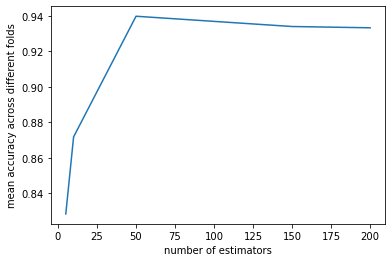

In [56]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y)
k = [5, 10, 50, 150, 200] # number of estimators
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 5])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y[train_index], Y[test_index]
        clf = GradientBoostingClassifier(n_estimators = k[i])
        clf = clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))
k_best = k[k_max_index]
plt.plot(k, acc.sum(axis = 1 )/5)
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy across different folds')
plt.show()

#### The best k is 50, which gives the accuracy of 93%. (original trainig dataset, without normalziation and pca/lda analysis)

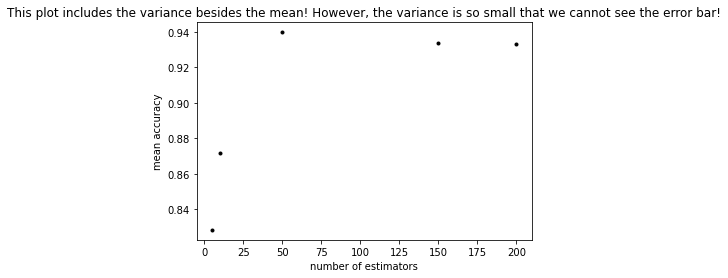

In [57]:
# This plot includes the variance besides the mean! However, the variance is so small that we can't see the error bar!

plt.figure()
plt.errorbar(k, acc.sum(axis = 1 )/5, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we cannot see the error bar!')
plt.show()

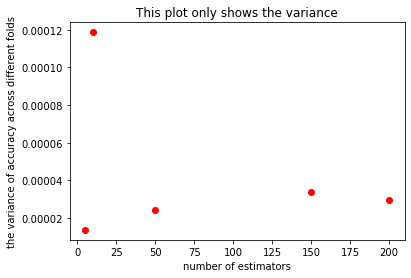

In [270]:
# This plot only shows the variance

plt.figure()
plt.errorbar(k, np.var(acc, axis=1), fmt='ro')
plt.xlabel('number of estimators')
plt.ylabel('the variance of accuracy across different folds')
plt.title('This plot only shows the variance')
plt.show()

## Grad Boost Classifier on PCA:

the best k: 150
0.9195652173913045


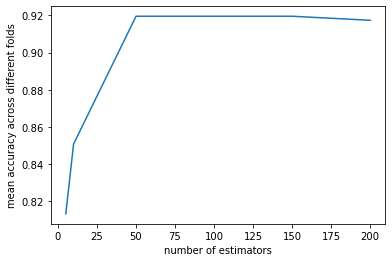

In [291]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y)
k = [5, 10, 50, 150, 200] # number of estimators
X_train = selected_PCA_features
acc = np.zeros([len(k) , 5])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y[train_index], Y[test_index]
        clf = GradientBoostingClassifier(n_estimators = k[i])
        clf = clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))
k_best = k[k_max_index]
plt.plot(k, acc.sum(axis = 1 )/5)
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy across different folds')
plt.show()

#### Based on the above results, gradient boost classifier works slightly better on the original dataset

### The above results was predicting the 'Recoverd' label. We now repeat the steps for using the gradient boost classifier for predicting the 'Deaths' and 'Confirmed' labels:

### A. the 'Deaths' label:

the best k: 10
0.9072463768115944


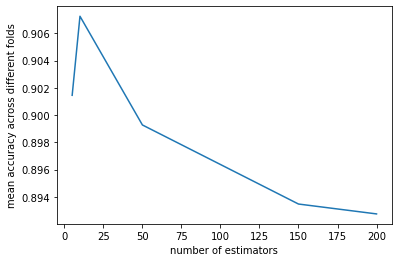

In [312]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_deaths)
k = [5, 10, 50, 150, 200] # number of estimators
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 5])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_deaths[train_index], Y_deaths[test_index]
        clf = GradientBoostingClassifier(n_estimators = k[i])
        clf = clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))
k_best = k[k_max_index]
plt.plot(k, acc.sum(axis = 1 )/5)
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy across different folds')
plt.show()

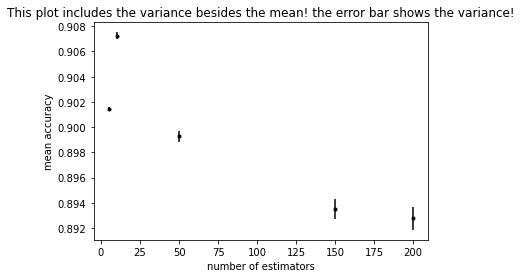

In [314]:
# This plot includes the variance besides the mean!

plt.figure()
plt.errorbar(k, acc.sum(axis = 1 )/5, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! the error bar shows the variance!')
plt.show()

## Gradient Tree Boosting on PCA with "deaths" label:

the best k: 10
0.9094202898550726


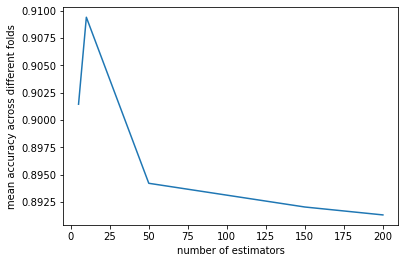

In [157]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_deaths)
k = [5, 10, 50, 150, 200] # number of estimators
X_train = selected_PCA_features
acc = np.zeros([len(k) , 5])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_deaths[train_index], Y_deaths[test_index]
        clf = GradientBoostingClassifier(n_estimators = k[i])
        clf = clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))
k_best = k[k_max_index]
plt.plot(k, acc.sum(axis = 1 )/5)
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy across different folds')
plt.show()

#### The results are almost the whether PCA is applied or not.

### B. the 'Confirmed' label:

the best k: 5
0.9630434782608696


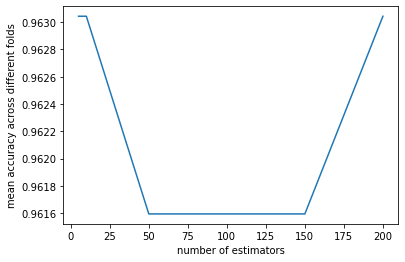

In [158]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_confirmed)
k = [5, 10, 50, 150, 200] # number of estimators
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 5])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_confirmed[train_index], Y_confirmed[test_index]
        clf = GradientBoostingClassifier(n_estimators = k[i])
        clf = clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))
k_best = k[k_max_index]
plt.plot(k, acc.sum(axis = 1 )/5)
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy across different folds')
plt.show()

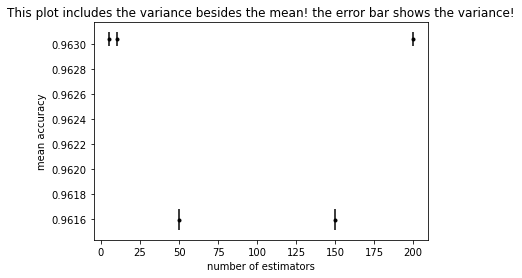

In [159]:
# This plot includes the variance besides the mean!

plt.figure()
plt.errorbar(k, acc.sum(axis = 1 )/5, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! the error bar shows the variance!')
plt.show()

## Gradient Tree Boosting on PCA with "deaths" label:

the best k: 5
0.9572463768115942


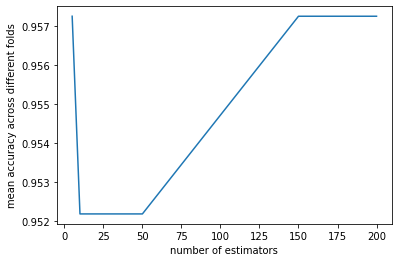

In [160]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(Y_confirmed)
k = [5, 10, 50, 150, 200] # number of estimators
X_train = selected_PCA_features
acc = np.zeros([len(k) , 5])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_confirmed[train_index], Y_confirmed[test_index]
        clf = GradientBoostingClassifier(n_estimators = k[i])
        clf = clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/5)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/5))
k_best = k[k_max_index]
plt.plot(k, acc.sum(axis = 1 )/5)
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy across different folds')
plt.show()

#### The accuracy without PCA was slightly better. 

## Naive Bayes Classifier:

#### Naive Bayes classifier is a classifier which is based on Bayes theorem. It works well on most data types and it is helpful when our dataset is not large enough but due to its fundamentals, it can cause problems. If some data is absent in the dataset, we can assume it is one, or we can assume it is zero. But this is not a correct assumption and can make errors. The solution for zero probablity is to use smoothing techniques. 
#### Smoothing is used to smooth categorical data, which is the parameter that we tried to find the optimal one with 10-fold cross-validation.

the best k: 0.001
0.6427536231884058


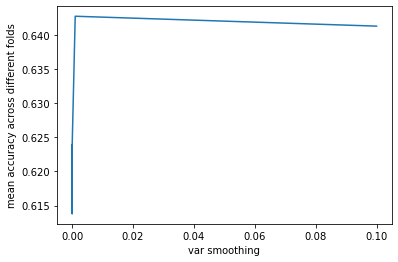

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
kf = KFold(n_splits=10)
kf.get_n_splits(Y)
k = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 10])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y[train_index], Y[test_index]
        clf = GaussianNB(var_smoothing=k[i])
        clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/10)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/10))
k_best = k[k_max_index]

plt.plot(k, acc.sum(axis = 1 )/10)
plt.xlabel('var smoothing')
plt.ylabel('mean accuracy across different folds')
plt.show()


#clf = clf (random_state=0, max_depth=k_best)
#clf = decision_tree.fit(X_train, Y)
#print (clf.score(df_test, Y_test))

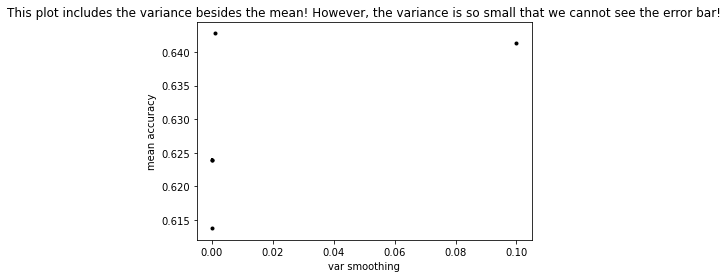

In [64]:
# This plot includes the variance besides the mean! However, the variance is so small that we can't see the error bar!

plt.figure()
plt.errorbar(k, acc.sum(axis = 1 )/10, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('var smoothing')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we cannot see the error bar!')
plt.show()

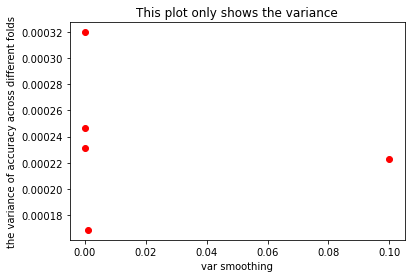

In [65]:
# This plot only shows the variance

plt.figure()
plt.errorbar(k, np.var(acc, axis=1), fmt='ro')
plt.xlabel('var smoothing')
plt.ylabel('the variance of accuracy across different folds')
plt.title('This plot only shows the variance')
plt.show()

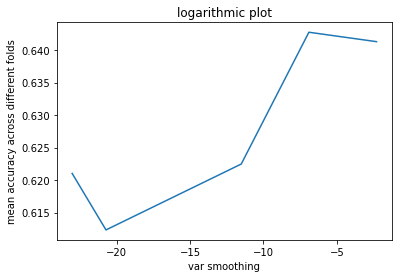

In [276]:
# k = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1], therfore a logarithmic plot would be more suitable as our hyperparameter has the form of e^(-t)

plt.plot(np.log(k), acc.sum(axis = 1 )/5)
plt.title('logarithmic plot')
plt.xlabel('var smoothing')s
plt.ylabel('mean accuracy across different folds')
plt.show()


## Naive Bayes on PCA:

the best k: 0.001
0.75


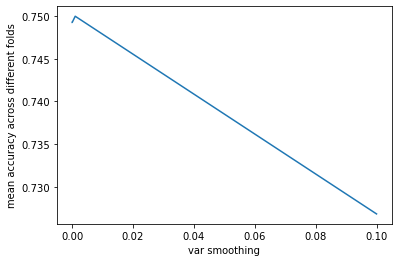

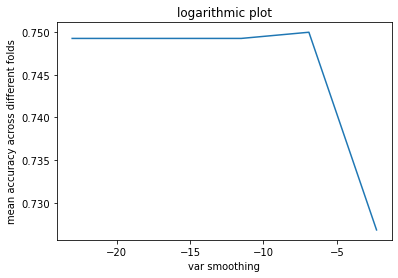

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
kf = KFold(n_splits=10)
kf.get_n_splits(Y)
k = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
X_train = selected_PCA_features
acc = np.zeros([len(k) , 10])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y[train_index], Y[test_index]
        clf = GaussianNB(var_smoothing=k[i])
        clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/10)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/10))
k_best = k[k_max_index]

plt.plot(k, acc.sum(axis = 1 )/10)
plt.xlabel('var smoothing')
plt.ylabel('mean accuracy across different folds')
plt.show()

# k = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1], therefore a logarithmic plot would be more suitable as our hyperparameter has the form of e^(-t)

plt.plot(np.log(k), acc.sum(axis = 1 )/10)
plt.title('logarithmic plot')
plt.xlabel('var smoothing')
plt.ylabel('mean accuracy across different folds')
plt.show()



 #### Based on the above results, the naive bayes classifier actually works better on PCA!
 #### The naive bayes classifier doesn't work as good as the three previous classifier though

#### The above results was predicting the 'Recoverd' label. We now repeat the steps for using the naive bayes classifier for predicting the 'Deaths' and 'Confirmed' labels:

#### A. the 'Deaths' label:

the best k: 0.1
0.9014492753623189


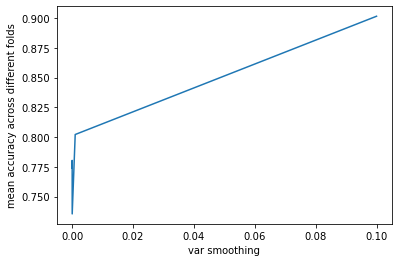

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
kf = KFold(n_splits=10)
kf.get_n_splits(Y_deaths)
k = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 10])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_deaths[train_index], Y_deaths[test_index]
        clf = GaussianNB(var_smoothing=k[i])
        clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/10)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/10))
k_best = k[k_max_index]

plt.plot(k, acc.sum(axis = 1 )/10)
plt.xlabel('var smoothing')
plt.ylabel('mean accuracy across different folds')
plt.show()


#clf = clf (random_state=0, max_depth=k_best)
#clf = decision_tree.fit(X_train, Y)
#print (clf.score(df_test, Y_test))

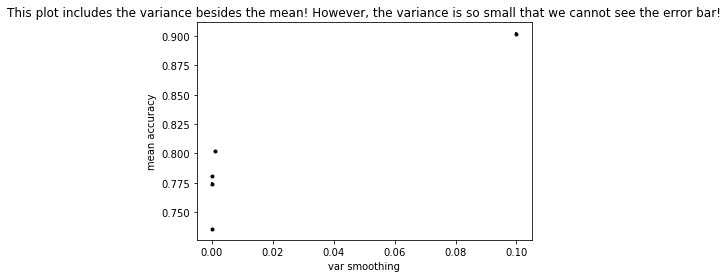

In [73]:
# This plot includes the variance besides the mean! However, the variance is so small that we can't see the error bar!

plt.figure()
plt.errorbar(k, acc.sum(axis = 1 )/10, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('var smoothing')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we cannot see the error bar!')
plt.show()

### B. the 'Confirmed' label:

the best k: 1e-05
0.9630434782608696


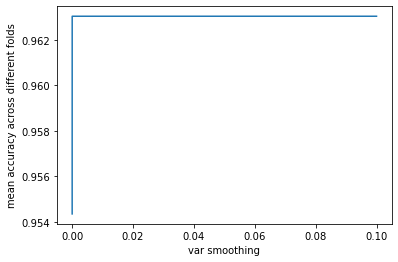

In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
kf = KFold(n_splits=10)
kf.get_n_splits(Y_confirmed)
k = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
X_train = df_cp. to_numpy()
acc = np.zeros([len(k) , 10])
for i in range(len(k)):
    j = 0
    for train_index, test_index in kf.split(X_train): 
        X_train_fold, X_validation = X_train[train_index], X_train[test_index]
        y_train_fold, y_validation = Y_confirmed[train_index], Y_confirmed[test_index]
        clf = GaussianNB(var_smoothing=k[i])
        clf.fit(X_train_fold, y_train_fold)
        acc[i,j] = clf.score(X_validation, y_validation)
        j +=1
k_max_index =  np.argmax(acc.sum(axis = 1 )/10)  
print('the best k:', k[k_max_index])  
print(np.max(acc.sum(axis = 1 )/10))
k_best = k[k_max_index]

plt.plot(k, acc.sum(axis = 1 )/10)
plt.xlabel('var smoothing')
plt.ylabel('mean accuracy across different folds')
plt.show()


#clf = clf (random_state=0, max_depth=k_best)
#clf = decision_tree.fit(X_train, Y)
#print (clf.score(df_test, Y_test))

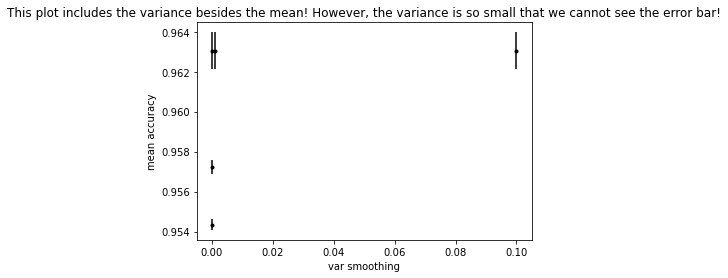

In [71]:
# This plot includes the variance besides the mean! However, the variance is so small that we can't see the error bar!

plt.figure()
plt.errorbar(k, acc.sum(axis = 1 )/10, yerr=np.var(acc, axis=1), fmt='.k')
plt.xlabel('var smoothing')
plt.ylabel('mean accuracy')
plt.title('This plot includes the variance besides the mean! However, the variance is so small that we cannot see the error bar!')
plt.show()

# Interpretability

#### Based on the accuracy of the models, decision trees did much better on the daatset, compared to the Naive Bayes model. 
#### The dataset contains different types of data, and decision trees can handle this situation well.
#### Using naive bayes it is important to select best features, and there is no random way to select them like decision trees.
#### Decision trees are a type of classifier which are used both for regression and classification problems. It has many advantages such as it is easy to visualize and interpret,can handle both numerical data and categorical data,are extremely fast and they perform well on large datasets. However, they have some disadvantages, such as they are prone to errors and overfitting. The solution is to train the tree on subsets of dataset, and this model is called random forest. We observed that random forest has higher accuracy on this dataset. 
#### Random forests combine a large number of trees , thus are more generalizable.
#### Gradient tree boosting also combine tree , but start the combining process at the beginning, instead of at the end.
#### Gradient boosting can result in better performance than random forests. However, gradient boosting may not be a good choice if the data has a lot of noise, as it can result in overfitting. They also tend to be harder to tune than random forests.
#### Random forests builds each tree independently while gradient boosting builds one tree at a time.
#### 
#### Decision trees are more flexible, and easy. A disadvantage of the naive bayes algorithm is the assumption of independent features which is not always true. Features in real life are dependent on each other, and it is better to use decision trees in this case.

#### Although decision trees, random forest and Gradient boosting has similar accuracy values, it is better to use random forest, due to its generalization and slightly higher accuracy.




# Kaggle:

#### Group 46 on Kaggle

Based on the results of the different classifiers tested, it seems that the random forest classifier is the best one in ters of performace. We use this classifier for the kaggle competition

In [161]:
df_kaggle = pd.read_csv('dkmacovid_kaggletest_features.csv')

In [162]:
df_cp_kaggle = df_kaggle.copy()
df_cp_kaggle = df_cp_kaggle.drop(columns="State")       #removing state name,  redundant since we can use State_ID 
df_cp_kaggle = df_cp_kaggle.drop(columns="Id")

In [163]:
Q1 = df_cp_kaggle.quantile(0.25)
Q3 = df_cp_kaggle.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)

df1 = df_cp_kaggle.copy()                  #substituting outliers with extreme values
for col in df_cp_kaggle.columns:
    for i in range(0,len(df_cp_kaggle[col])):
        if df_cp_kaggle[col][i] < lower_bound[col]:            
            df_cp_kaggle[col][i] = lower_bound[col]

        if df_cp_kaggle[col][i] > upper_bound[col]:            
            df_cp_kaggle[col][i] = upper_bound[col] 
for col in df_cp_kaggle.columns:
    df1[col] = df_cp_kaggle[col]
    
# TODO: Remove the Warning

<ipython-input-163-6c8d7845bea6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_kaggle[col][i] = lower_bound[col]
<ipython-input-163-6c8d7845bea6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_kaggle[col][i] = upper_bound[col]


In [164]:
df_zscore_kaggle = (df1 - df1.mean())/df1.std()    #normalization with Zscore

In [165]:
print(df_zscore_kaggle.columns, df_zscore.columns)

Index(['Day', 'State_ID', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident_Population_2020_Census', 'Population_Density_2020_Census',
       'Density_Rank_2020_Census', 'SexRatio'],
      dtype='object') Index(['Day', 'State_ID', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident_Population_2020_Census', 'Population_Density_2020_Census',
       'Density_Rank_2020_Census', 'SexRatio'],
      dtype='object')


In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train = df_zscore.to_numpy()

clf = RandomForestClassifier(random_state=0 , max_depth=None , n_estimators = 200)
clf = clf.fit(X_train, Y_recovered)
y_pred = np.zeros((150, 3))
y_pred[:, 2] = clf.predict(df_zscore_kaggle.to_numpy())

clf = RandomForestClassifier(random_state=0 , max_depth=3 , n_estimators = 50)
clf = clf.fit(X_train, Y_deaths)
y_pred[:, 1] = clf.predict(df_zscore_kaggle.to_numpy())

clf = RandomForestClassifier(random_state=0 , max_depth=10 , n_estimators = 50)
clf = clf.fit(X_train, Y_confirmed)
y_pred[:, 0] = clf.predict(df_zscore_kaggle.to_numpy())



In [167]:
y_pred

array([[1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1

In [168]:
df_pred = pd.DataFrame(y_pred)

In [169]:
frames = [df_kaggle, df_pred]
df_concat_ = pd.concat(frames, axis=1)
df_concat_.head()

,Id,Day,State_ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident_Population_2020_Census,Population_Density_2020_Census,Density_Rank_2020_Census,SexRatio,0,1,2
0,0,2,14,Illinois,40.3495,-88.9861,957138,7697.015291,13436652,1.867428,106035.6834,12812508,230.8,14,97,1.0,1.0,0.0
1,5,3,14,Illinois,40.3495,-88.9861,961499,7732.282519,13482117,1.869933,106394.4716,12812508,230.8,14,97,1.0,1.0,0.0
2,10,4,14,Illinois,40.3495,-88.9861,966468,7772.205747,13530371,1.869466,106775.2693,12812508,230.8,14,97,1.0,1.0,0.0
3,15,5,14,Illinois,40.3495,-88.9861,973157,7826.175891,13617454,1.871700,107462.4870,12812508,230.8,14,97,1.0,1.0,0.0
4,20,6,14,Illinois,40.3495,-88.9861,980553,7885.906848,13698428,1.874835,108101.4954,12812508,230.8,14,97,1.0,1.0,0.0


In [170]:
df_concat_ = df_concat_.rename(columns={0: 'Confirmed', 1: 'Deaths', 2: 'Recovered'})

In [171]:
df_submit = df_concat_[['Id', 'Confirmed', 'Deaths', 'Recovered']]

In [172]:
df_submit.head()

,Id,Confirmed,Deaths,Recovered
0,0,1.0,1.0,0.0
1,5,1.0,1.0,0.0
2,10,1.0,1.0,0.0
3,15,1.0,1.0,0.0
4,20,1.0,1.0,0.0


In [173]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df_submit.to_csv('out.zip', index=False,
          compression=compression_opts)